# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [4]:
hm=pd.read_csv("hmeq.csv")

In [5]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [6]:
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [7]:
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [8]:
data.shape

(5960, 13)

**Insights**

* There are 5960 rows and 13 columns in our dataset.

### **Check the data types of the columns**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**

* The first thing we notice is that we are missing values from all the columns except **BAD** and **LOAN**. We assume that this is an indication that the forms are not filled right by the customers and the employees are not paying attention to the missing values. 
* We have 3 types of data, **integer**, **float** and **object**.

### **Check for missing values**

In [10]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [11]:
perc_missing_values=(data.isnull().sum() / len(hm))*100

perc_missing_values.round(2)

BAD         0.00
LOAN        0.00
MORTDUE     8.69
VALUE       1.88
REASON      4.23
JOB         4.68
YOJ         8.64
DEROG      11.88
DELINQ      9.73
CLAGE       5.17
NINQ        8.56
CLNO        3.72
DEBTINC    21.26
dtype: float64

**Insights**

* We notice that some variables are missing. Two variable are more than 10%.
* **DEROG** missing values percent is around 11.88% and and **DEBTINC** missing values percent is around 21.26%. We are losing a lot of important information from the variable **DEBTINC**. Hence the lender's are missing the 21% of the borrower's ability to manage the monthly payments to repay the money they plan to borrow.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider? 
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

* **Considering our big dataset, the total number of missing values might be high, but it doesn't tell you how important that is relative to the total size of your dataset. However the percentage, indicates the proportion of missing values relatively to the overall number of data points in the dataset. Thus, It gives us a more standardized way in understanding the effect of missing data.**

* **There is no specific limit for % of the missing values unless there are exact rules and regulations from the indrustry we are receiving the data. Normally if the column with the missing data is around 5% or 10% we can handle them without a significant impact; unless the missing values are more than 60-70% it would be better to avoid applying that datasets to analysis.**

* **Challenges of filling missing data can cause Bias and Overfitting while avoiding missing data can cause Data Loss and lacking important information which they can be used to exctract recoursul insights and meaningful observations.**


**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [12]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [13]:
cols

['REASON', 'JOB', 'BAD']

In [14]:
for i in cols:
    data[i] = data[i].astype('category')

In [15]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [16]:
# Analyze the summary statistics for numerical variables

data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**

* The average amount of **LOAN** is 18.600 units.The maximum amount is 89.900 and the minimum is 1.100.
* The figures reveal that the average of **MORTDUE** is 73.760. The numbers demonstrate that the minimum is 2063 and the maximum is 399.550.
* It can be seen from the statistics summary that the **VALUE** has a minimum value of 8000 and a maximum 855909. That shows that there is considerable difference among the min and max values.
* **YOJ** has an average of 9 years of the present job.The minimum value is 0 and the maximum is 41. We notice a significant difference of the average applicant years at a job with the maximum value.
* The results of **DEROG** show an average of 0.25 with a minimum value of 0 and maximum 10, has been reported as major derogatory. **Statistically we can summarize that 1 in 4 applications have been indicated as a serious deliquency.**
* From the figures it is apparent that the average of **DELINGQ** is approximately 0.45, with a minimum value of 0 and maximum 15.
* The variable **CLAGE** has an average value around of 180. The minimum value is 0 and the maximum is 1168.
* **NINQ** has an average around 1.2 with a minimum value 0 and maximum 17.
* The statistics show that the average number of **CLNO** is relatively 21 with minimum 0 and maximum at 71. It can be observed that 50% of the values is 20 which means that we have a normal distribution of the data.
* The mean value of **DEBTINC** is 33.78. It can also be observed that the 50% of the values is 34.8 which means that there is a normal distribution of the data.

In [17]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**

* The **BAD** variable is consisted by 2 unique values. The most frequent cases where the load is repaid (in this case is number 0) is around 80%. The 20% percent of the cases client defaulted on loan (in this case is number 1).
* The **REASON** variable constists 2 unique values, and the most frequent is the DebtCon (debt consolidation) which is around 0.66% of the data.
* **JOB** variable has 6 unique values with the most frequent value being **Other** which constists the 40% of the data.

**Let's look at the unique values in all the categorical variables**

In [18]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].nunique())
    print('*'*40)

Unique values in BAD are :
2
****************************************
Unique values in REASON are :
2
****************************************
Unique values in JOB are :
6
****************************************


**Insights**

### As pointed out above we have the following:
* There are 2 unique values for the **BAD** variable. The first (1) is for the defaulted clients and the second (0) is for the applicants who paid the loan.
* The **REASON** has 2 unique values, **HomeImpo** and **DebtCon**.
* The **JOB** varieable has 6 unique values. We don't know all the proffesions in the columns.

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

* **It is noticeable that absolute numbers are not a good measure. Before proceeding to further exploration of the data it is vital to clean and transform the values so as to achieve high accurancy on the results.**

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [19]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(10,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

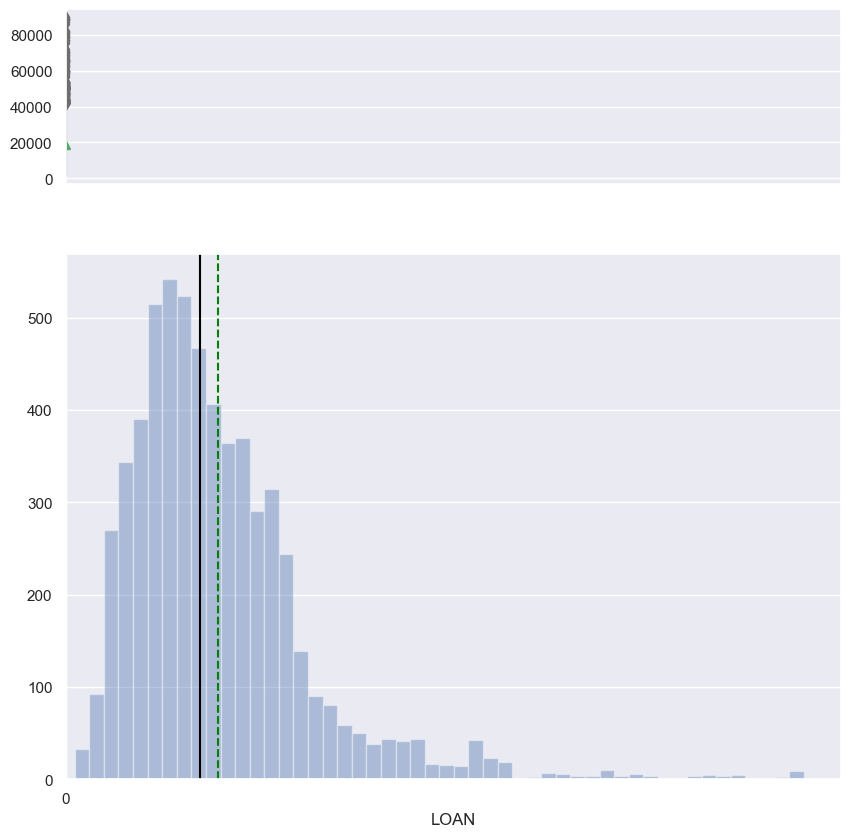

In [20]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**

The variable **LOAN** has a right-skewed distribution. There are also a lot of **Outliers**.

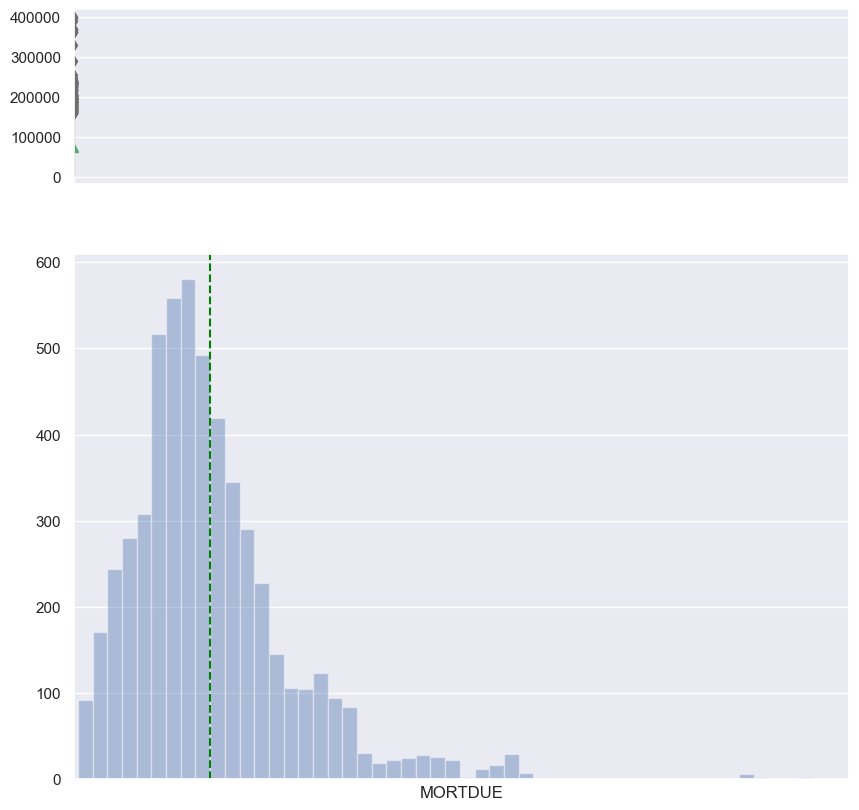

In [21]:
histogram_boxplot(data['MORTDUE'])

**Insights**

We notice a right-skewed distribution of the **MORTDUE** variable. There is also a significant number of outliers. On the boxplot it can also be observed the lack of the outliers.

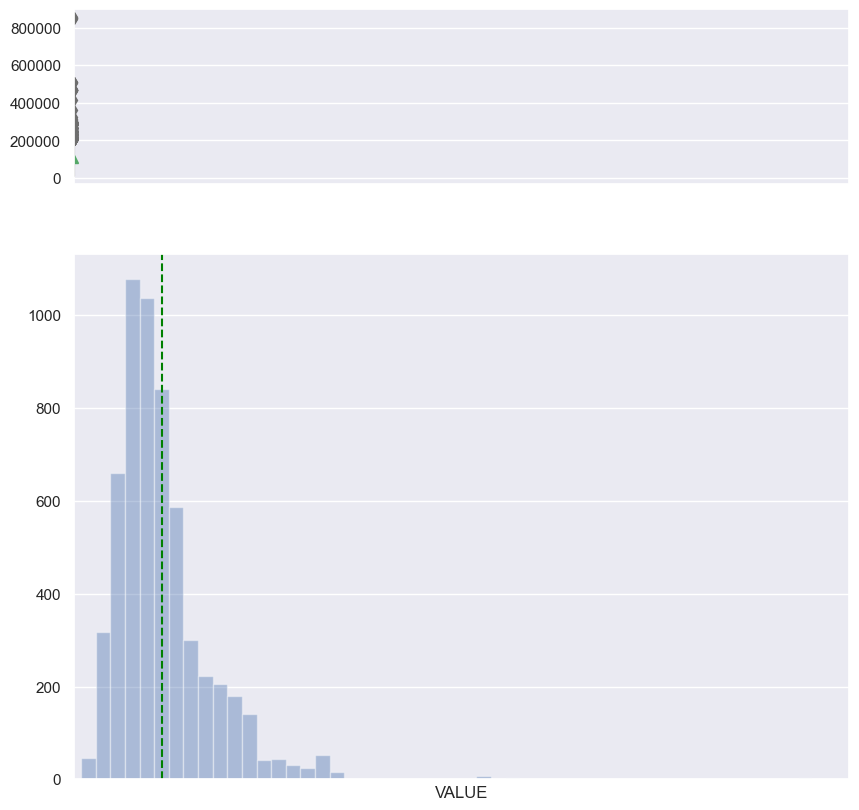

In [22]:
histogram_boxplot(data['VALUE'])

**Insights**

The **VALUE** tends to a right-skewed distribution without any noticable quartiles from the boxplot with a lot of outliers.

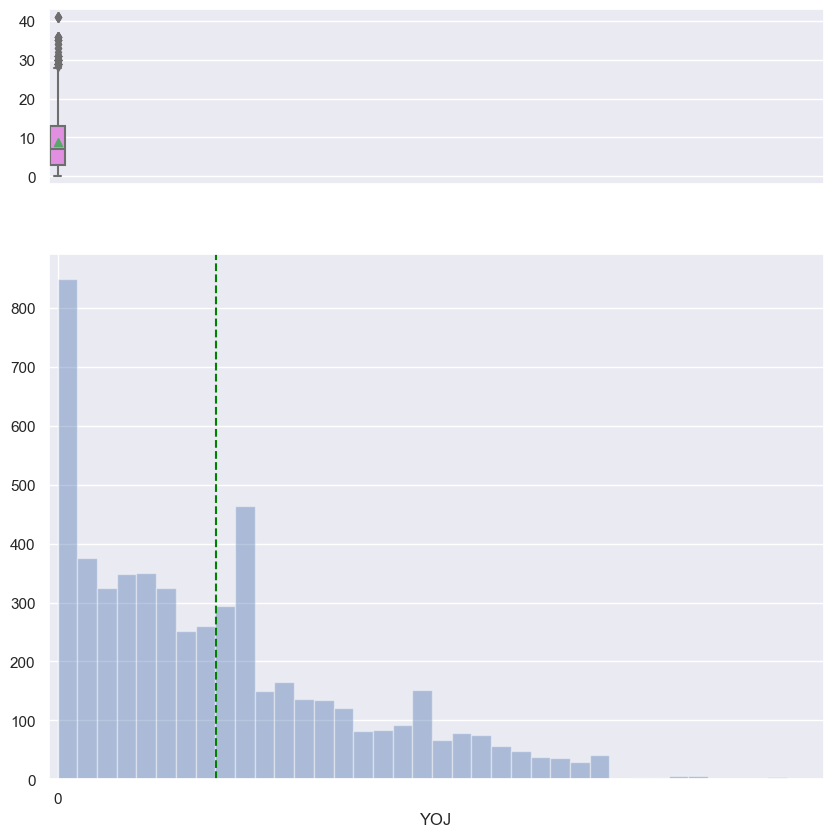

In [23]:
histogram_boxplot(data['YOJ'])

**Insights**

* **YOJ** variable tends to a right-skewed distribution. From the boxplot it can be observed the quartiles. We can also notice a large number of applicants with 0 years of job who requested a loan.

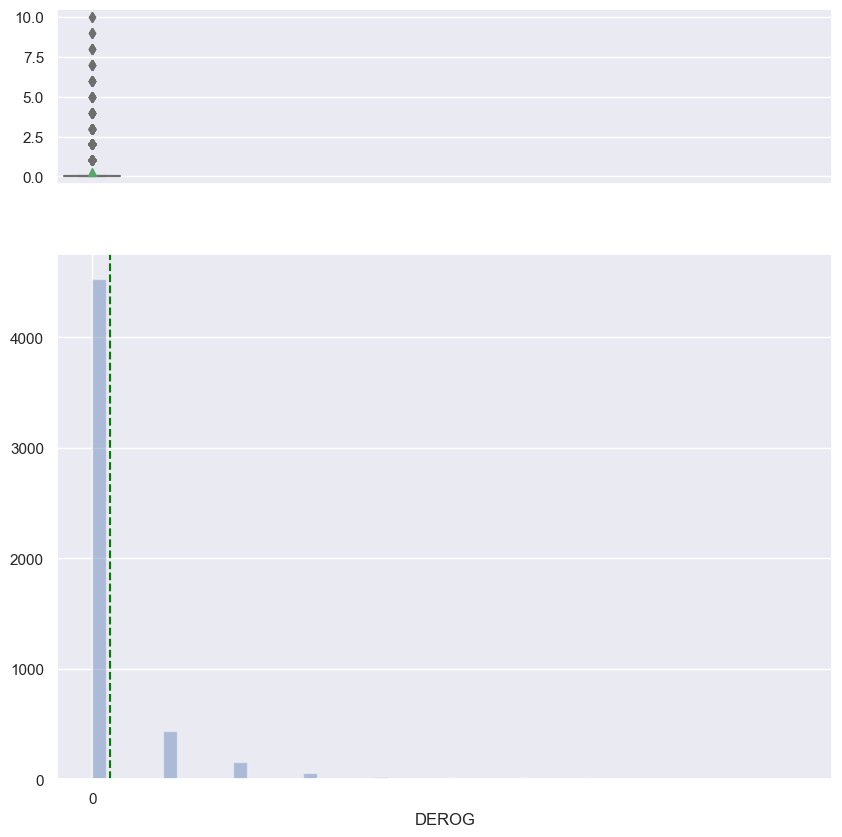

In [24]:
histogram_boxplot(data['DEROG'])

**Insights**

* There are almost 0 DEROG. No quartiles can be seen from the boxplot.

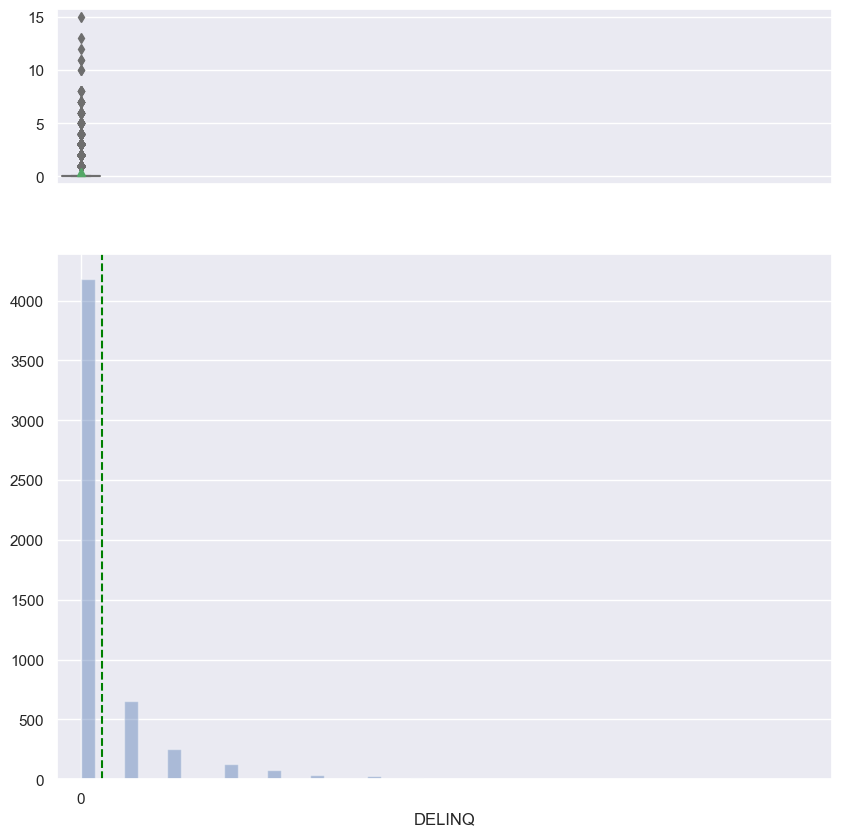

In [25]:
histogram_boxplot(data['DELINQ'])

**Insights**

Same as above, there are almost 0 **DELINQ**. No quartiles can be seen from the boxplot.

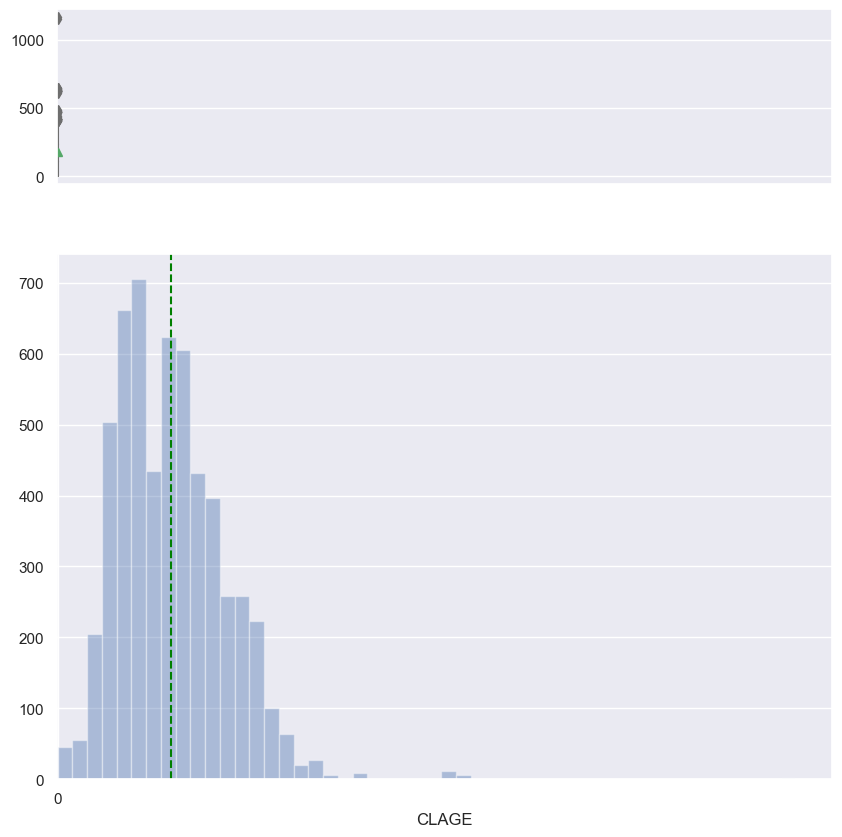

In [26]:
histogram_boxplot(data['CLAGE'])

**Insights**

* The **CLAGE** variable has a right-skewed distribution. From the boxplot we can notice a lot of outliers and **no quartiles**.

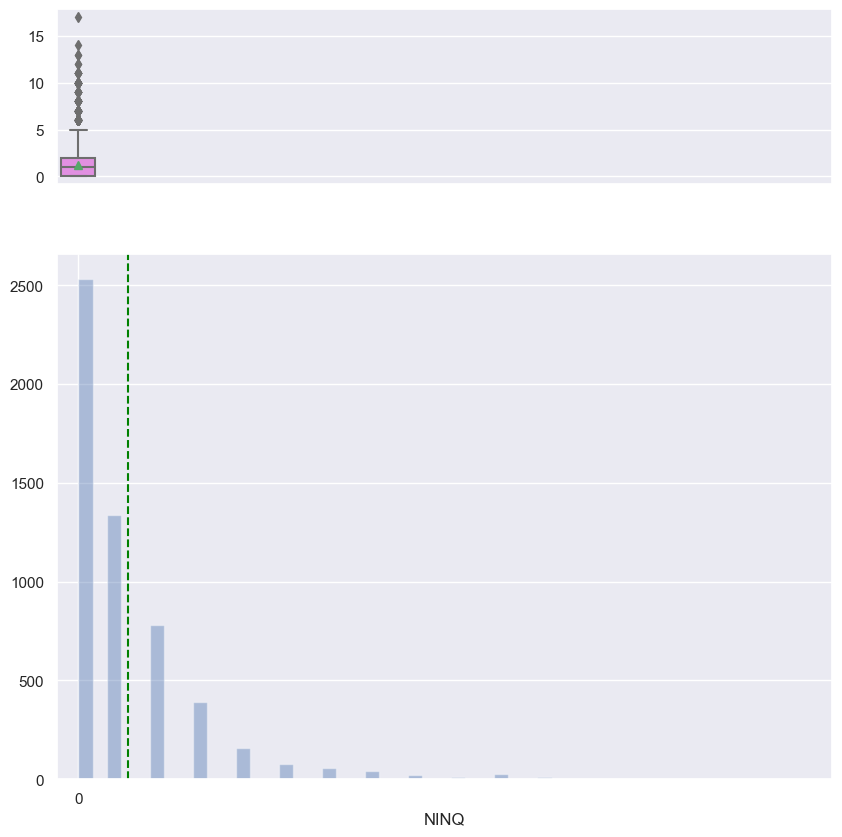

In [27]:
histogram_boxplot(data['NINQ'])

**Insights**

* More than 2500 applicants have 0 **NINQ**. Same here, a lot of outliers can be seen.

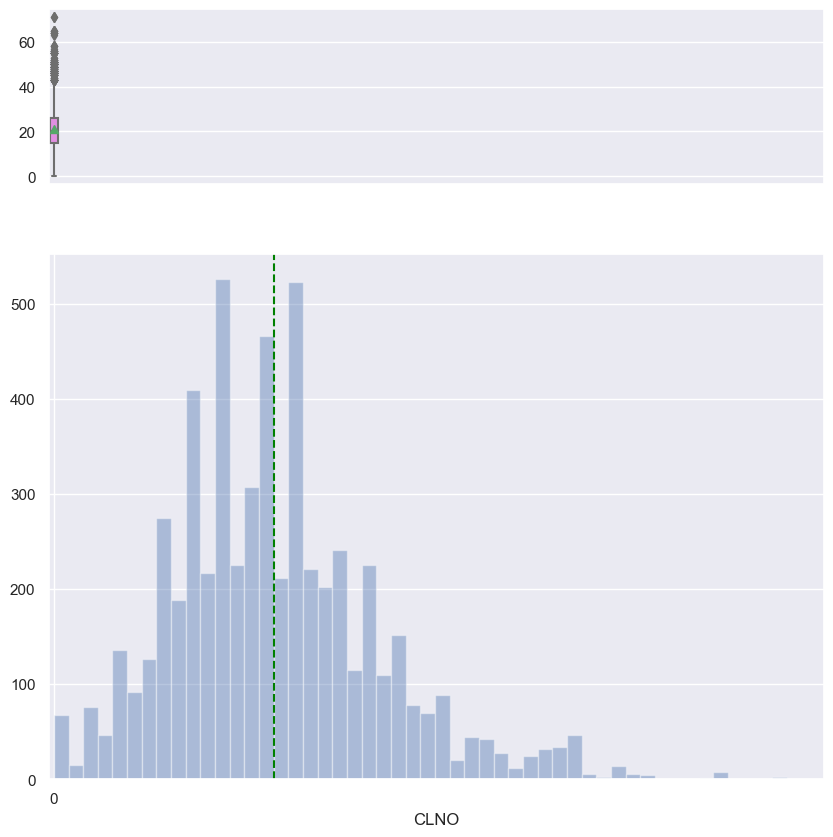

In [28]:
histogram_boxplot(data['CLNO'])

**Insights**

The **CLNO** variable has a more smooth right-skewed distribution. There are also some outliers.

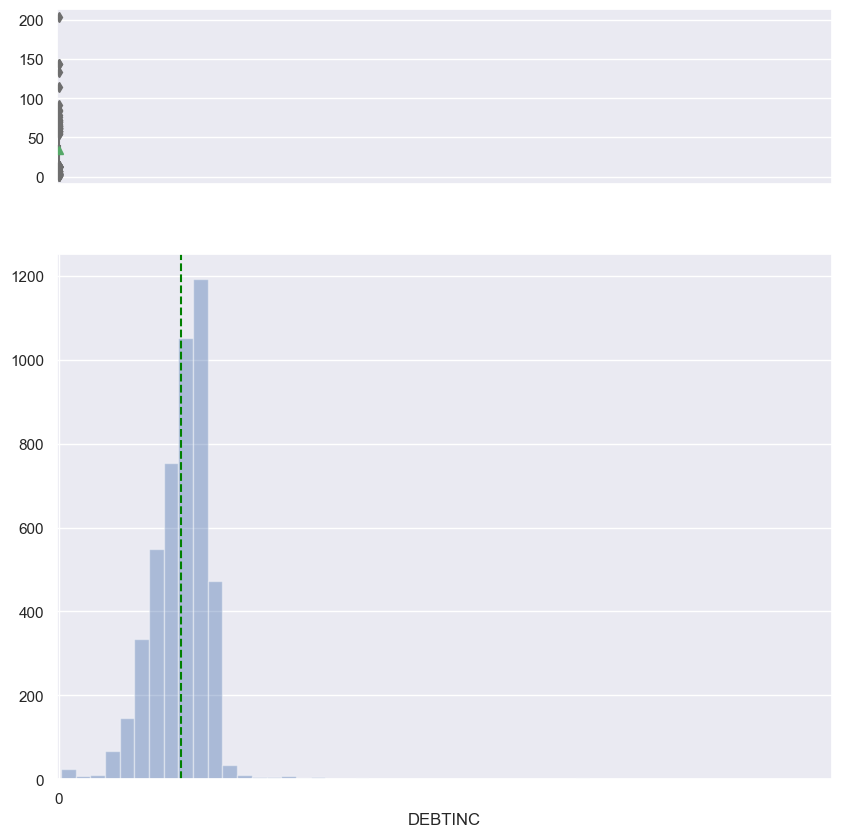

In [29]:
histogram_boxplot(data['DEBTINC'])

**Insights**

* The **DEBTINC** has a right-skewed distribution. From the boxplot we notice many outliers and without quartiles

### **2. Univariate Analysis - Categorical Data**

In [30]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

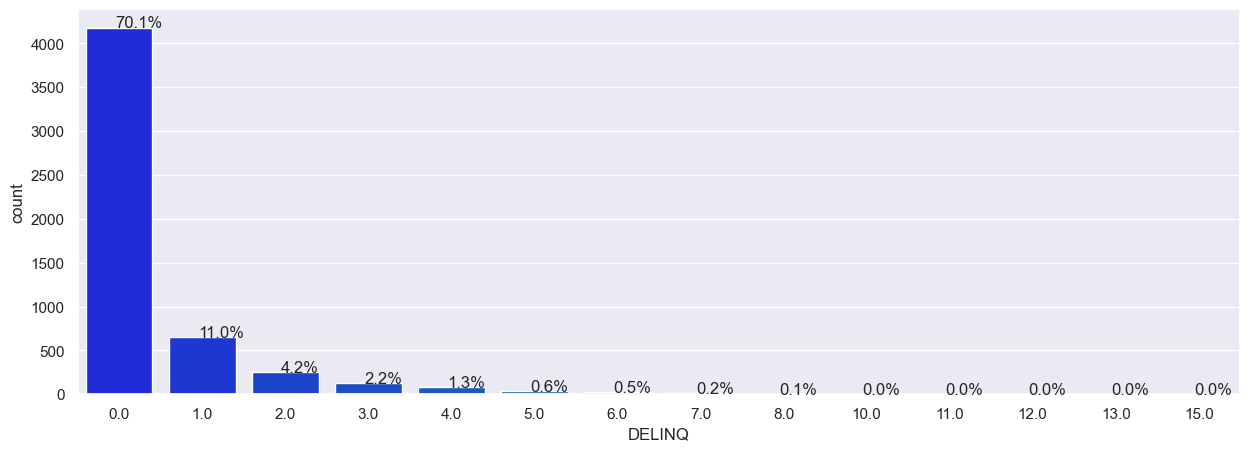

In [31]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**

* We notice that more than 4000 applicants have **0 DELINQ**. Additionally, more than 500 applicants have **1 DELINQ**

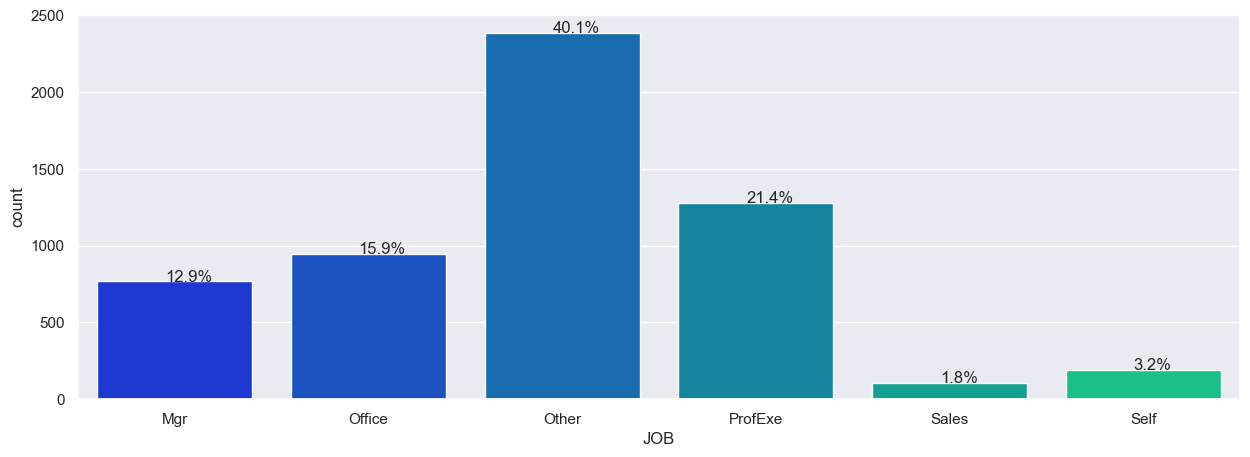

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data['JOB'], palette='winter')
perc_on_bar(ax, data['JOB'])

**Insights**

The majority of the known proffessions is that of **ProfExe** with **21.4%**. However 40% of applicants have selected **Other** proffesions.

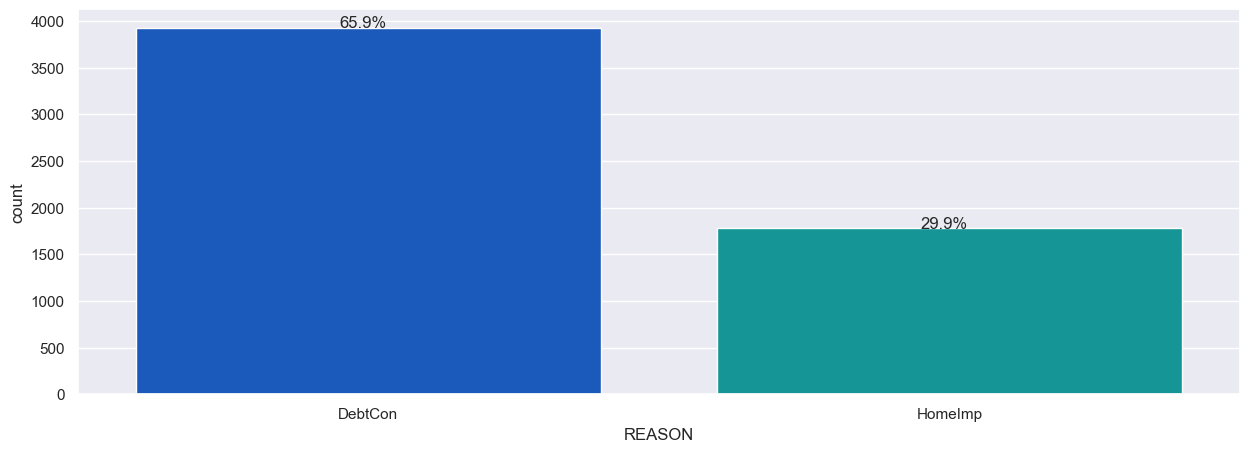

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data['REASON'],palette='winter')
perc_on_bar(ax,data['REASON'])

**Insights**

Almost **30%** of the applicants have a **REASON** to take a loan for **HomeImp** and around **65.9%** for **DebtCon**. We missing 4.2% **REASON** for the rest of the applicants. It is not some significant to be taken care into consideration.

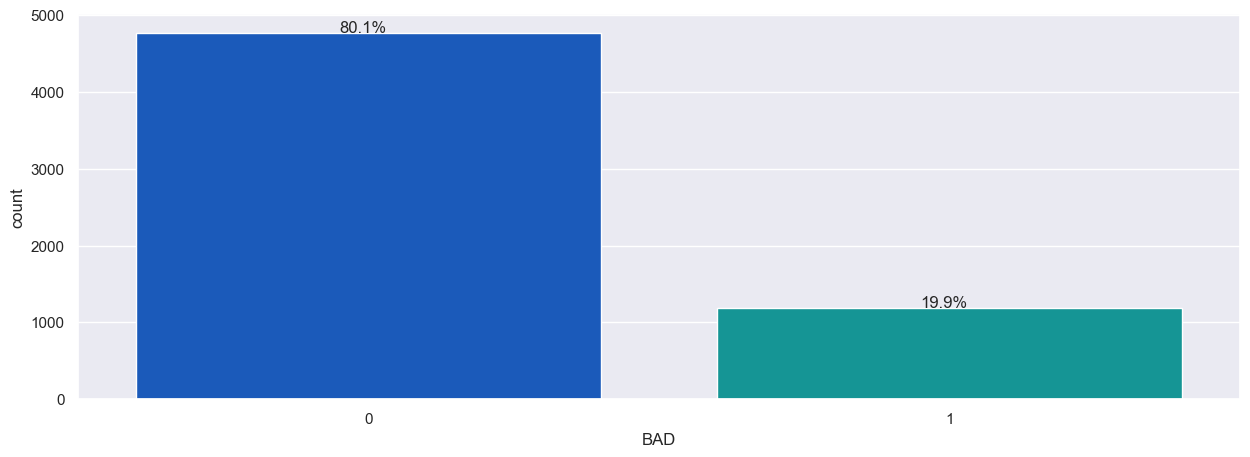

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data['BAD'],palette='winter')
perc_on_bar(ax,data['BAD'])

**Insights**

**The 1/5 of the applicants have repaid the loan.**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='LOAN', ylabel='BAD'>

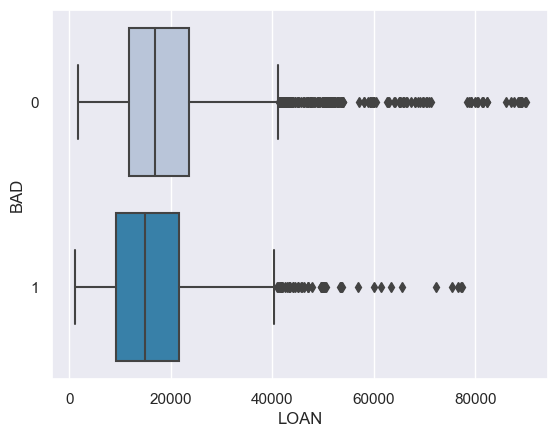

In [35]:
sns.boxplot(data=data, y="BAD",x='LOAN',palette="PuBu")

<Axes: xlabel='YOJ', ylabel='BAD'>

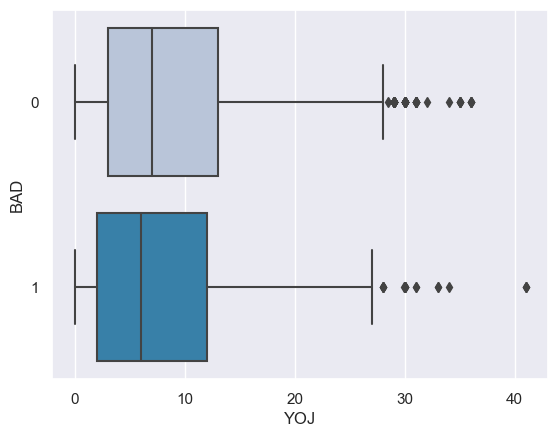

In [36]:
sns.boxplot(data=data, y="BAD",x='YOJ',palette="PuBu")

<Axes: xlabel='MORTDUE', ylabel='BAD'>

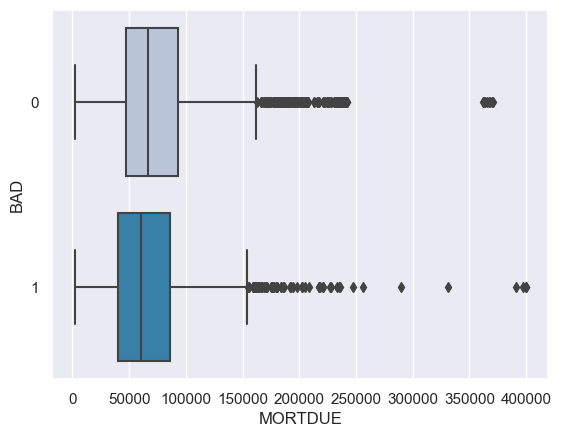

In [37]:
sns.boxplot(data=data, y="BAD",x='MORTDUE',palette="PuBu")

<Axes: xlabel='DEBTINC', ylabel='BAD'>

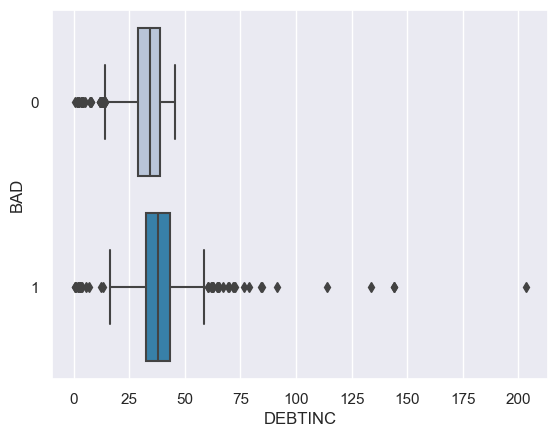

In [38]:
sns.boxplot(data=data, y="BAD",x='DEBTINC',palette="PuBu")

<Axes: xlabel='DELINQ', ylabel='BAD'>

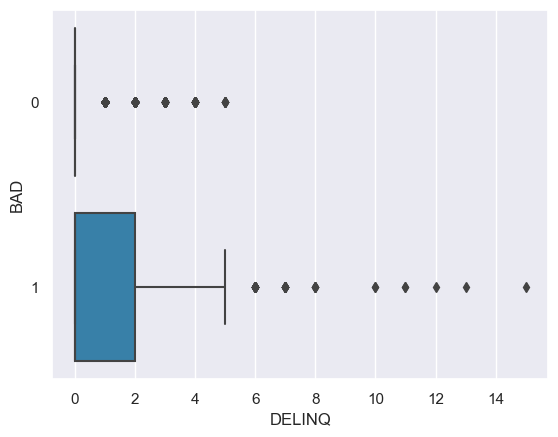

In [39]:
sns.boxplot(data=data, y="BAD",x='DELINQ',palette="PuBu")

<Axes: xlabel='LOAN', ylabel='REASON'>

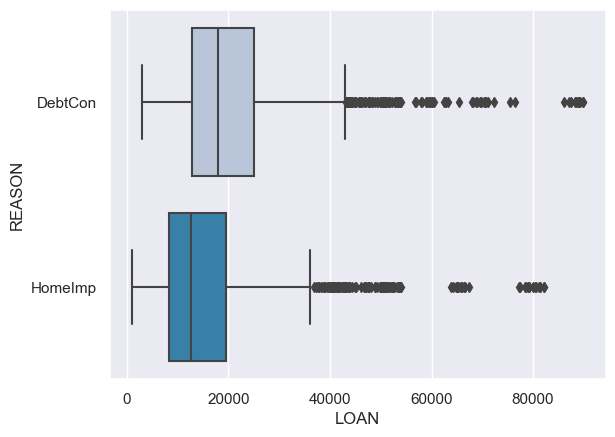

In [40]:
sns.boxplot(data=data, y="REASON",x='LOAN',palette="PuBu")

**Insights**

It can be observed the average applicants who take mortgage for **DebtCon** tend to lend more money than those who take it for **HomeImp**. The distribution for **REASON** above is slightly different as it can seen from the boxplot.

<Axes: xlabel='MORTDUE', ylabel='REASON'>

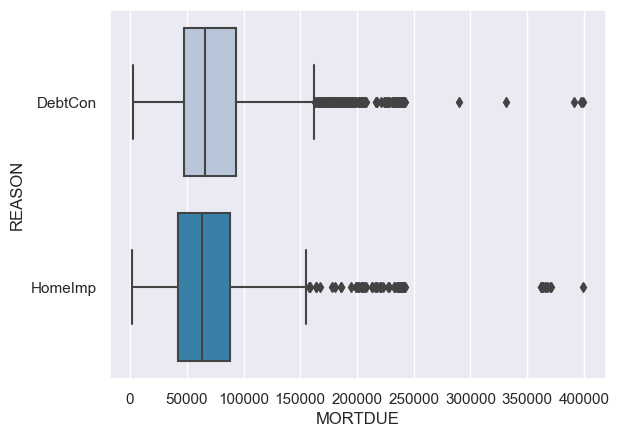

In [41]:
sns.boxplot(data=data, y="REASON",x='MORTDUE',palette="PuBu")

<Axes: xlabel='YOJ', ylabel='REASON'>

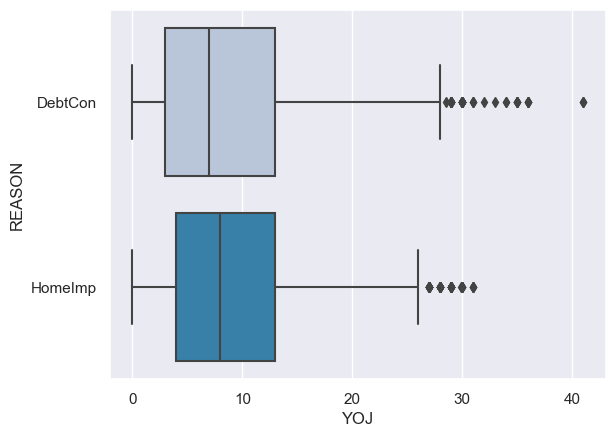

In [42]:
sns.boxplot(data=data, y="REASON",x='YOJ',palette="PuBu")

<Axes: xlabel='VALUE', ylabel='REASON'>

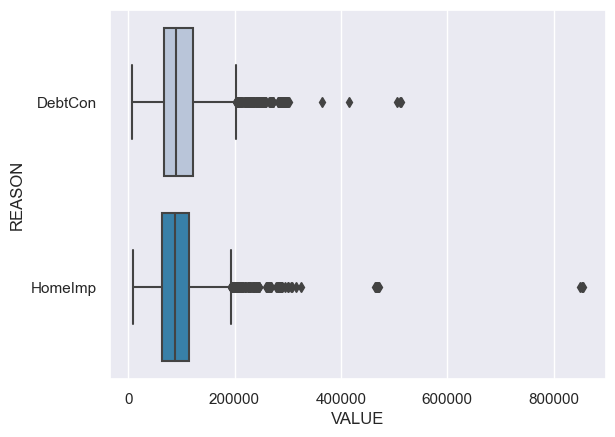

In [43]:
sns.boxplot(data=data, y="REASON",x='VALUE',palette="PuBu")

<Axes: xlabel='LOAN', ylabel='JOB'>

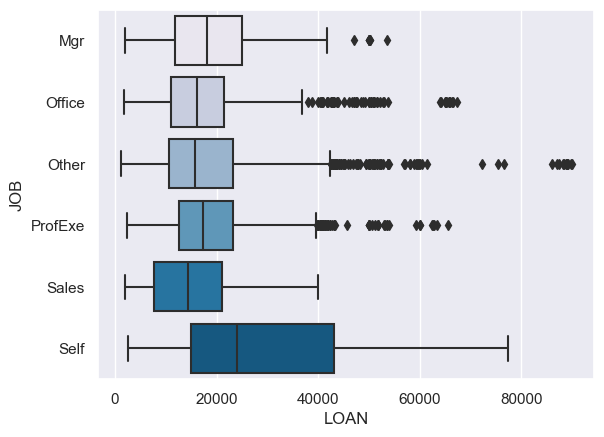

In [44]:
sns.boxplot(data=data, y="JOB",x='LOAN',palette="PuBu")

<Axes: xlabel='LOAN', ylabel='JOB'>

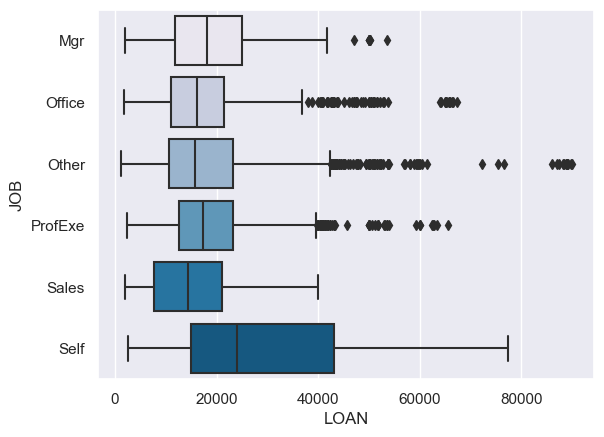

In [45]:
sns.boxplot(data=data, y="JOB",x='LOAN',palette="PuBu")

**Insights**

* The Q3 quartile of the applicants who are **Self** employed lend more money than all the other proffesions' max value. Except the **Sales** and **Self** we notice many outliers on distribution.

<Axes: xlabel='MORTDUE', ylabel='JOB'>

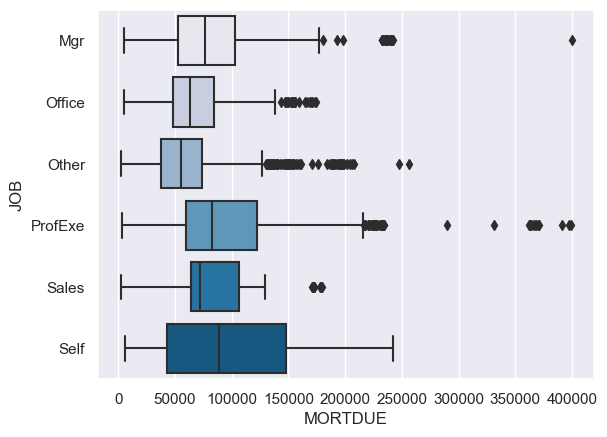

In [46]:
sns.boxplot(data=data, y="JOB",x='MORTDUE',palette="PuBu")

<Axes: xlabel='VALUE', ylabel='JOB'>

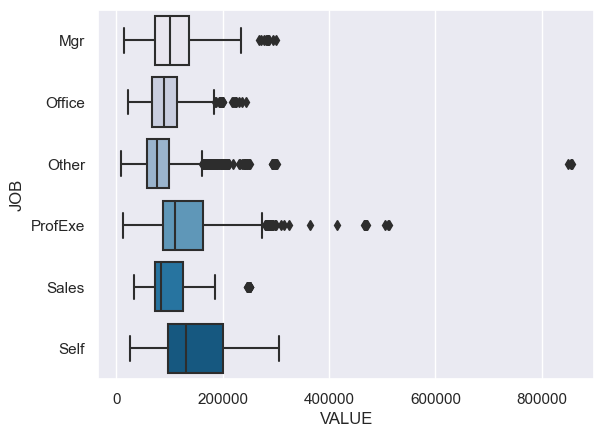

In [47]:
sns.boxplot(data=data, y="JOB",x='VALUE',palette="PuBu")

<Axes: xlabel='YOJ', ylabel='JOB'>

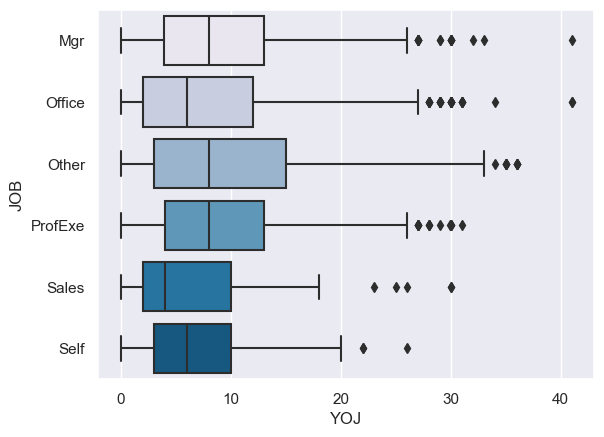

In [48]:
sns.boxplot(data=data, y="JOB",x='YOJ',palette="PuBu")

<Axes: xlabel='DELINQ', ylabel='JOB'>

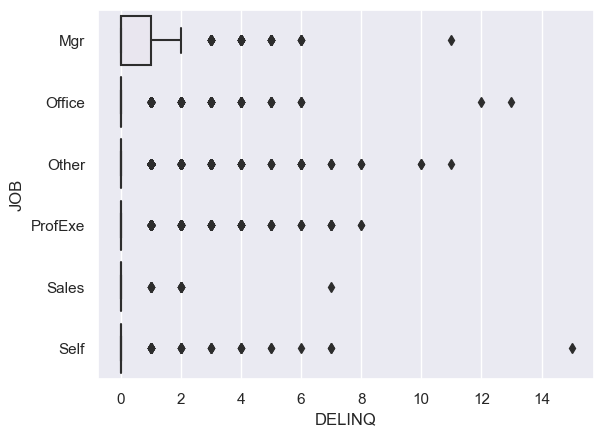

In [49]:
sns.boxplot(data=data, y="JOB",x='DELINQ',palette="PuBu")

<Axes: xlabel='DEBTINC', ylabel='JOB'>

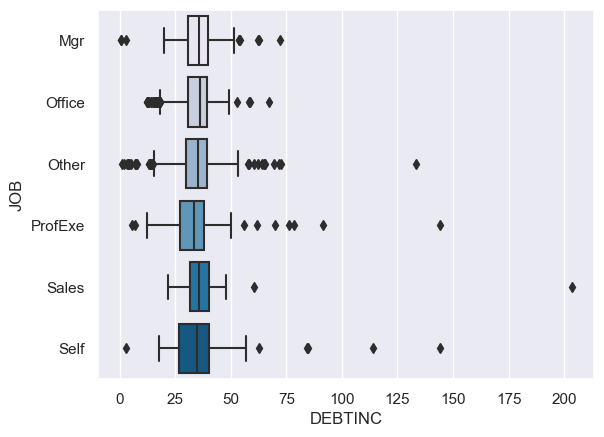

In [50]:
sns.boxplot(data=data, y="JOB",x='DEBTINC',palette="PuBu")

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

<Axes: xlabel='MORTDUE', ylabel='VALUE'>

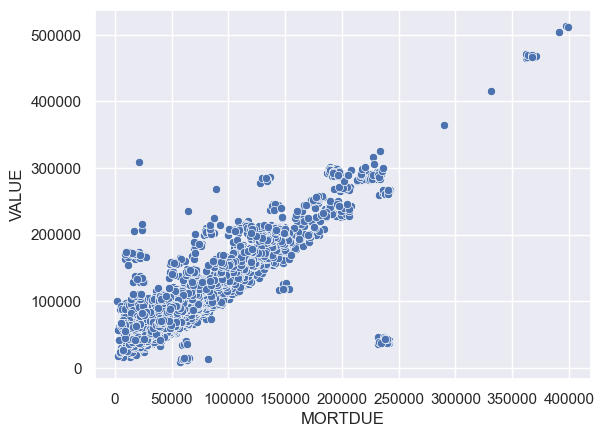

In [51]:
sns.scatterplot(data=data, y="VALUE",x='MORTDUE',palette="PuBu")

**Insights**

* We notice a positive correlation between the **VALUE** and the **MORTDUE**. From that we understand that the higher the value of the property the higher the amount due to existing loan, which is normal.

<Axes: xlabel='MORTDUE', ylabel='DEBTINC'>

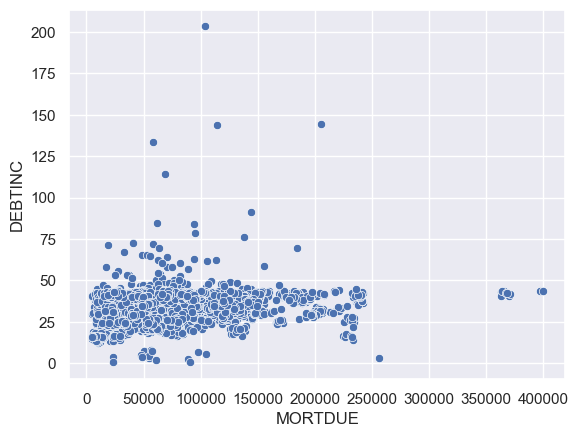

In [52]:
sns.scatterplot(data=data, y="DEBTINC",x='MORTDUE',palette="PuBu")

<Axes: xlabel='YOJ', ylabel='DEBTINC'>

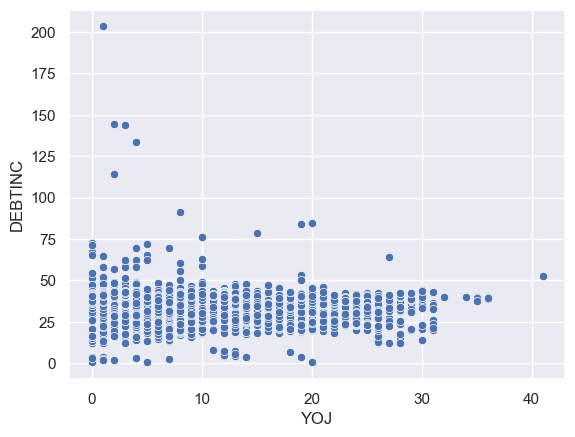

In [53]:
sns.scatterplot(data=data, y="DEBTINC",x='YOJ',palette="PuBu")

<Axes: xlabel='MORTDUE', ylabel='LOAN'>

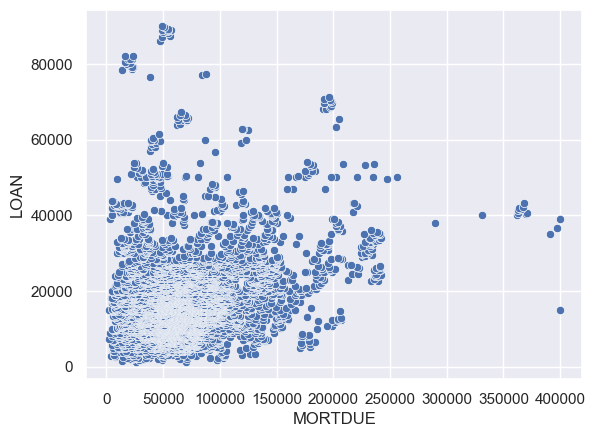

In [54]:
sns.scatterplot(data=data, y="LOAN",x='MORTDUE',palette="PuBu")

<Axes: xlabel='YOJ', ylabel='LOAN'>

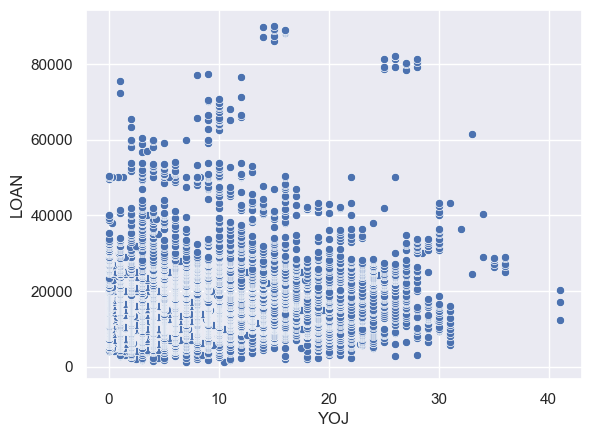

In [55]:
sns.scatterplot(data=data, y="LOAN",x='YOJ',palette="PuBu")

<Axes: xlabel='DEBTINC', ylabel='LOAN'>

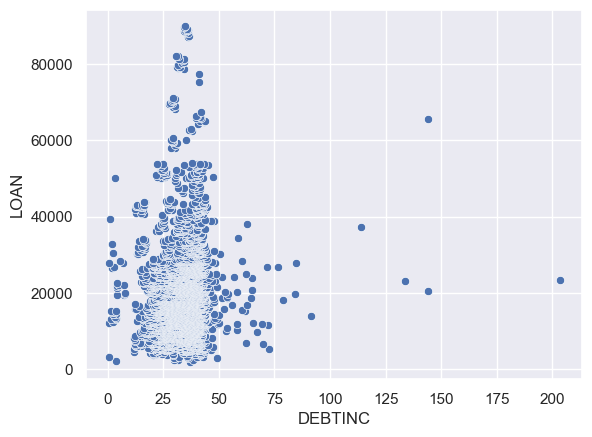

In [56]:
sns.scatterplot(data=data, y="LOAN",x='DEBTINC',palette="PuBu")

<Axes: xlabel='MORTDUE', ylabel='BAD'>

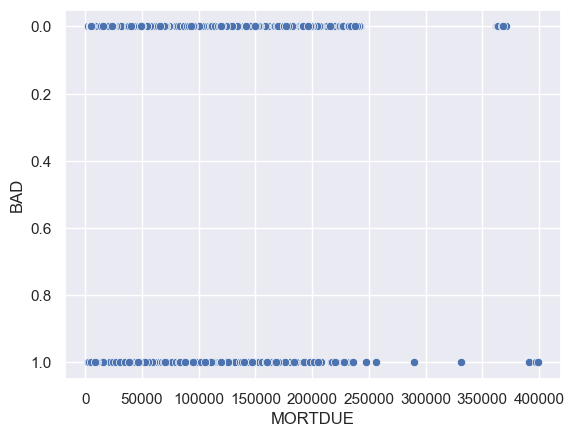

In [57]:
sns.scatterplot(data=data, y="BAD",x='MORTDUE',palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [58]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


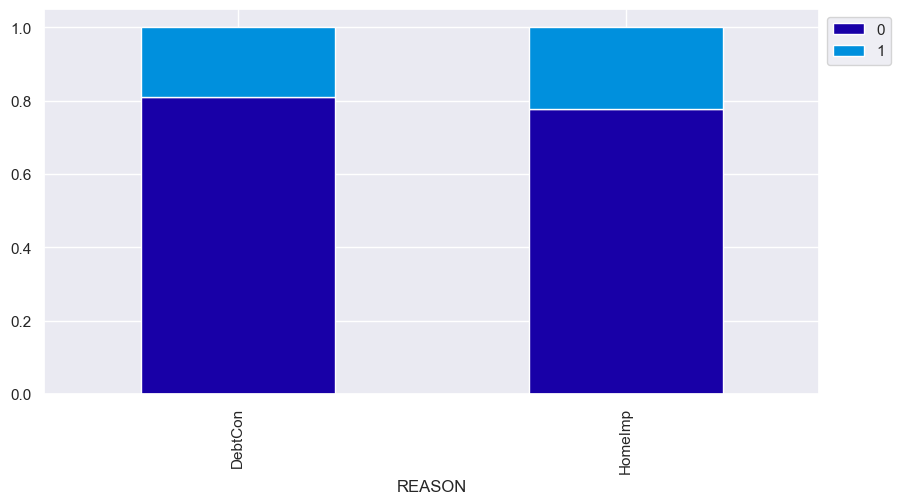

In [59]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


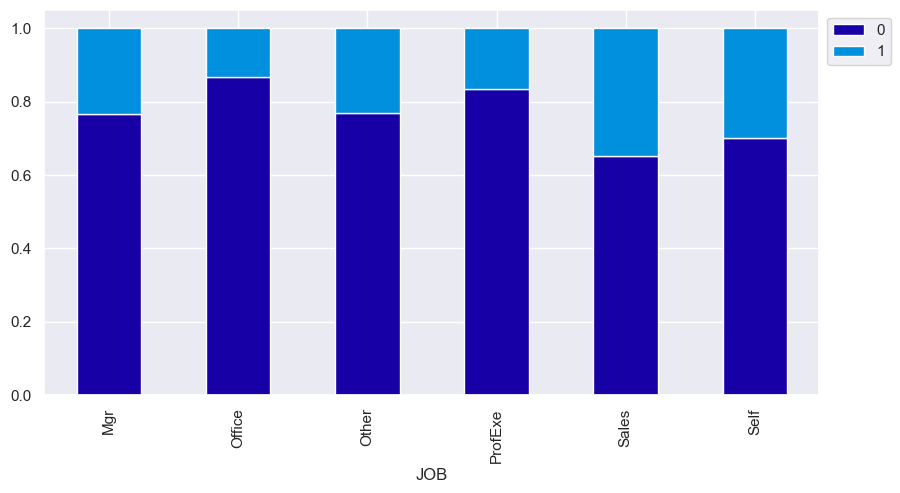

In [60]:
stacked_plot(data['JOB'])

**Insights**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

**Insights**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

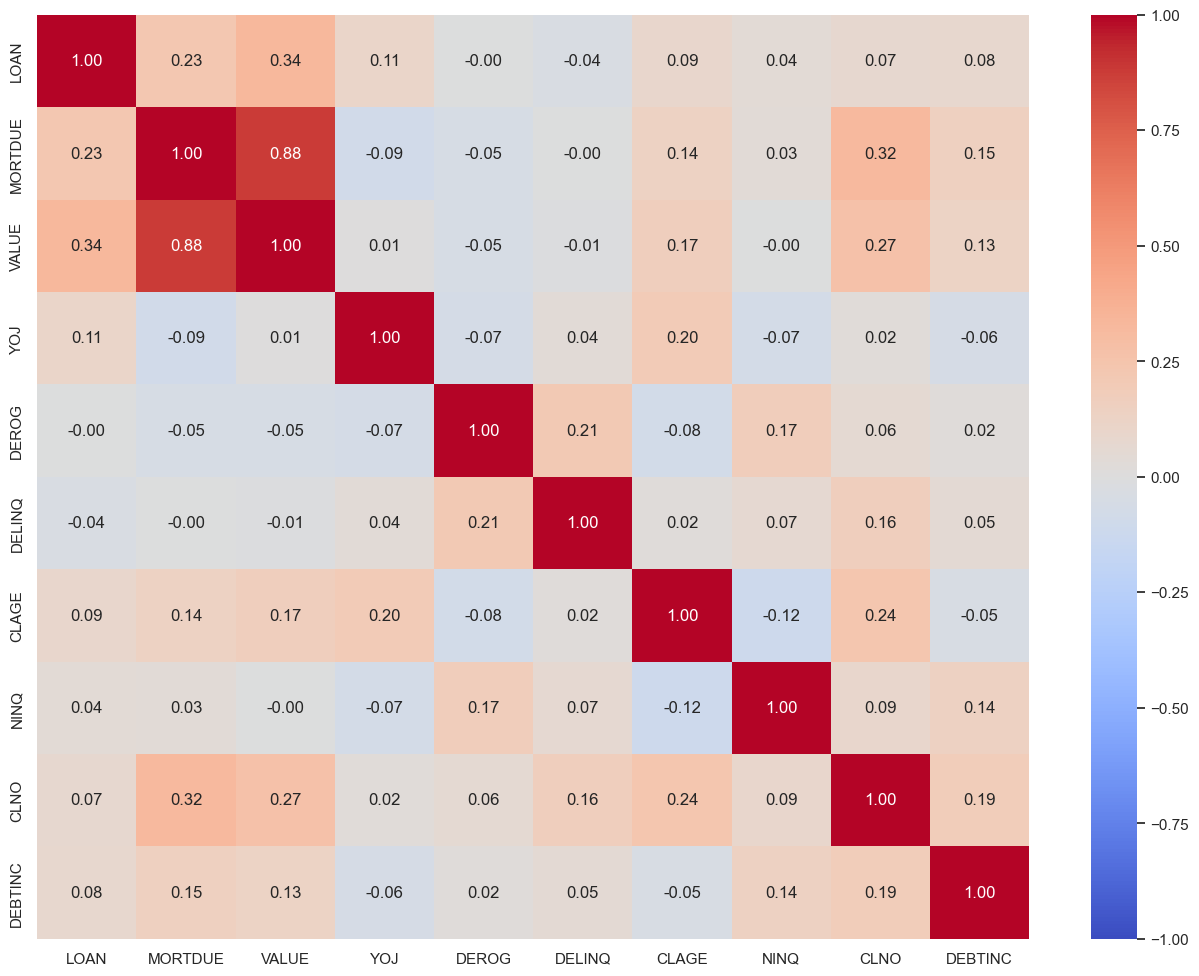

In [61]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(data[numerical_col].corr(),annot=True, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

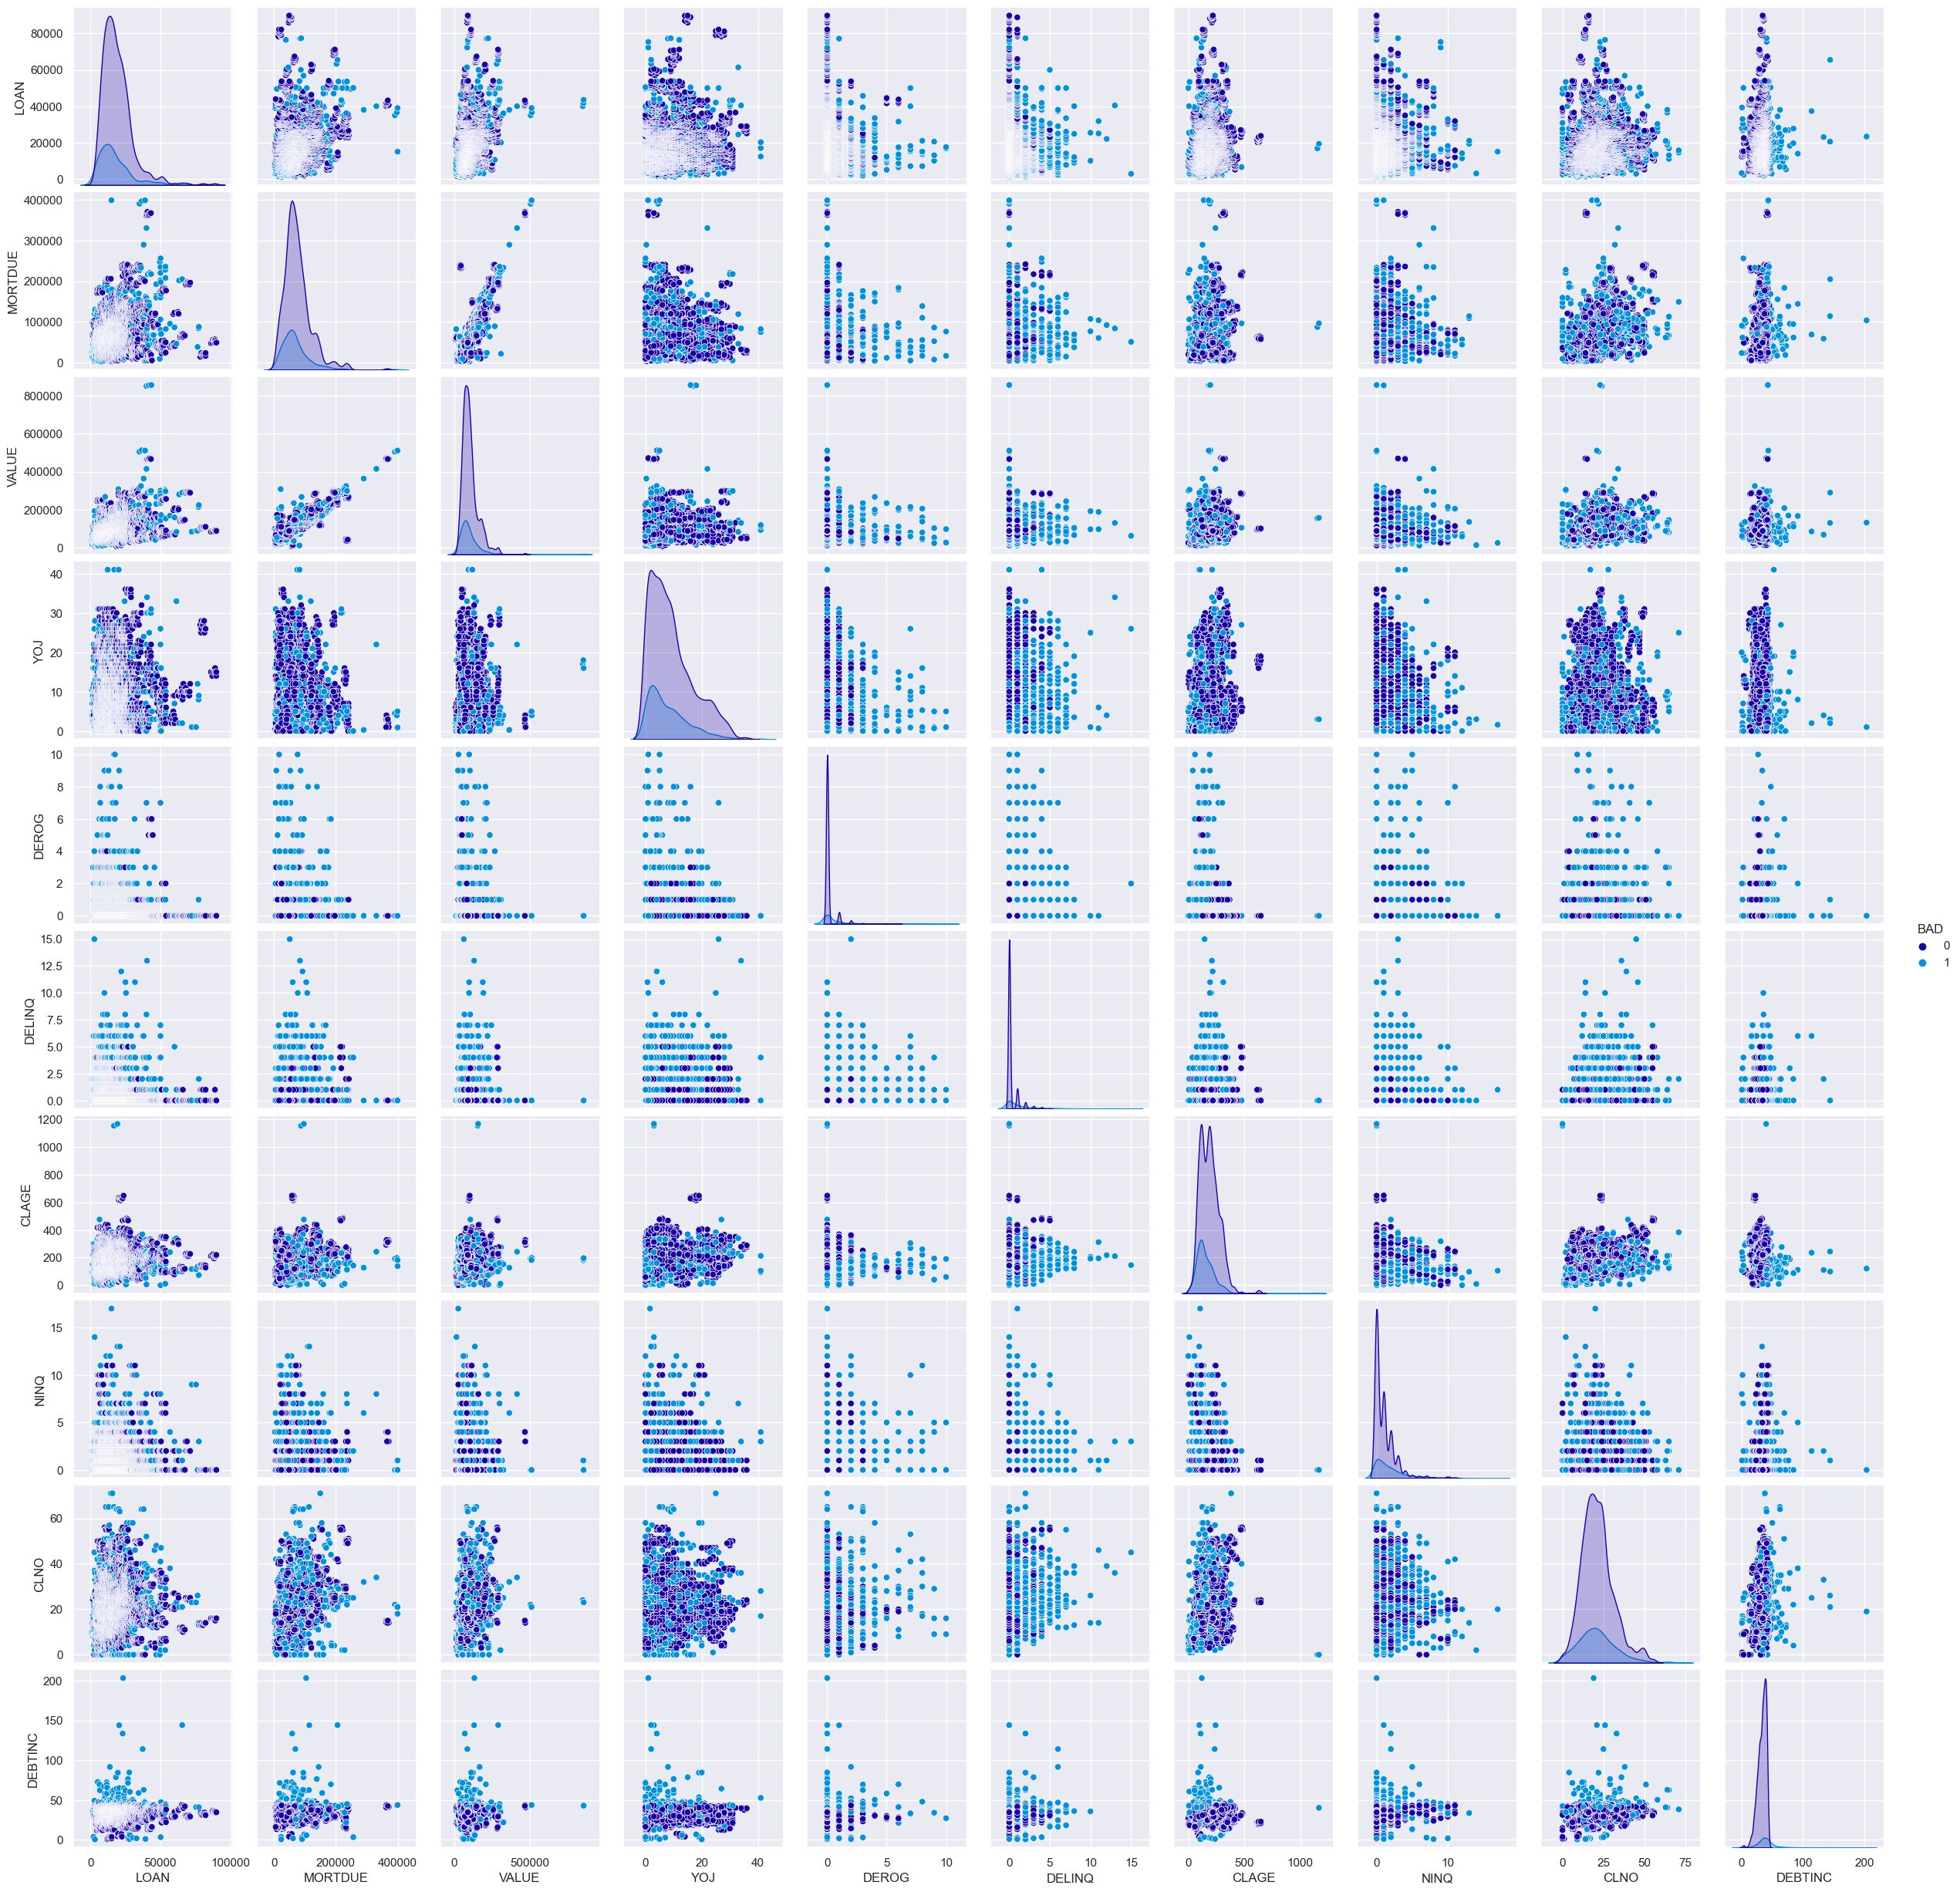

In [62]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue='BAD')
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [63]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    
    Q1=data[col].quantile(0.25)  # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data

In [64]:
data_raw = data.copy()

numerical_col = data_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

data = treat_outliers_all(data_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [65]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(data,col):
    '''
    data: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isna()
    return data

In [66]:
# list of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for column in missing_col:
    add_binary_flag(data,column)


#### Filling missing values in numerical columns with median and mode in categorical variables

In [67]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [68]:
#@title
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)
Y = data['BAD']

### **Splitting the data into 70% train and 30% test set**

In [69]:
#@title
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [70]:
#@title
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Model can make wrong predictions as:

1. Predicting a customer will default the loan in reality, the customer will not default the loan
2. Predicting a customer will not default the loan in reality, the customer will default the loan. 

### Which case is more important? 

* If we predict that a customer will default the loan and it will not be defaulted, the bank will lose a potential client and the opportunity to increase the revenue of the bank.

* If we predict that a customer will not default the loan and it will be defaulted, this will have some negative consequences such as the financial statement, the health, the operations and the reputation of the bank.

Both cases are equally important.

### How to reduce the losses?

* Company would want `Precision` and `Recall` to be maximized. We need to focus on the right balance between the metrics and create an accurate model and avoiding the overfitting.

### **Build a Logistic Regression Model** 

In [71]:
#@title
# Defining the Logistic regression model
# Remove _________ and complete the code
lg = LogisticRegression()

# Fitting the model on the training data 
# Remove _________ and complete the code

lg.fit(X_train, y_train)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 27)
Shape of test set :  (1788, 27)
Percentage of classes in training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.69      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.75      0.51      0.47      4172
weighted avg       0.78      0.81      0.73      4172



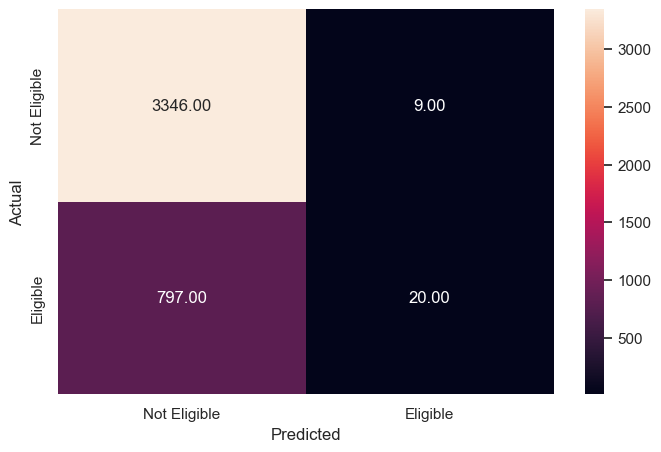

In [72]:
#@title
#Predict for train set
y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



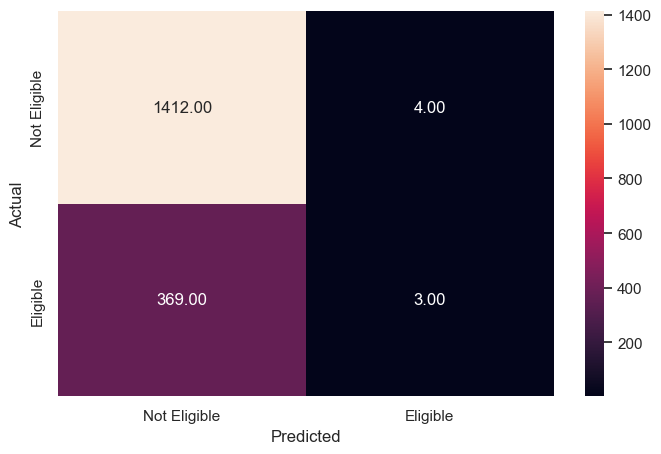

In [73]:
#@title
#Predict for test set
y_pred_test = lg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

**Observations:**

* We notice that both the train dataset and the test dataset have the same accuracy numbers, which are 0.81 and 0.79 respectivelly.
* This is an indicator that the data are not overfitting.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [74]:
#@title
# Printing the coefficients of logistic regression

cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False).round(6)

0
DEBTINC                      0.020758
CLNO                         0.007849
NINQ                         0.004581
DEBTINC_missing_values_flag  0.004216
VALUE_missing_values_flag    0.000671
JOB_Self                     0.000183
REASON_HomeImp               0.000170
JOB_Sales                    0.000131
CLAGE_missing_values_flag    0.000110
JOB_Other                    0.000088
CLNO_missing_values_flag     0.000018
REASON_missing_values_flag   0.000008
DEROG                        0.000000
DELINQ                       0.000000
VALUE                       -0.000001
MORTDUE                     -0.000005
LOAN                        -0.000027
MORTDUE_missing_values_flag -0.000104
JOB_ProfExe                 -0.000189
YOJ_missing_values_flag     -0.000281
NINQ_missing_values_flag    -0.000316
JOB_missing_values_flag     -0.000359
DELINQ_missing_values_flag  -0.000421
JOB_Office                  -0.000474
DEROG_missing_values_flag   -0.000522
YOJ                         -0.002320
CLAGE                       -0.007735

**Insights**

**Features which positively affect on the rate are:**
- DEBTINC_missing_values_flag
- NINQ
- DEBTINC
- VALUE_missing_values_flag
- JOB_Self
- CLNO
- CLAGE_missing_values_flag
- JOB_Sales
- REASON_HomeImp
- REASON_missing_values_flag
- CLNO_missing_values_flag
- VALUE

**Features which negatively affect on the attrition rate are:**
- MORTDUE
- LOAN
- MORTDUE_missing_values_flag
- JOB_ProfExe 
- JOB_Other
- YOJ_missing_values_flag
- NINQ_missing_values_flag
- JOB_missing_values_flag
- DELINQ_missing_values_flag
- JOB_Office
- DEROG_missing_values_flag
- CLAGE
- YOJ

### We change the threshold of the linear regression and observe any changes to the numbers of precision and recall.

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.69      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.75      0.51      0.47      4172
weighted avg       0.78      0.81      0.73      4172



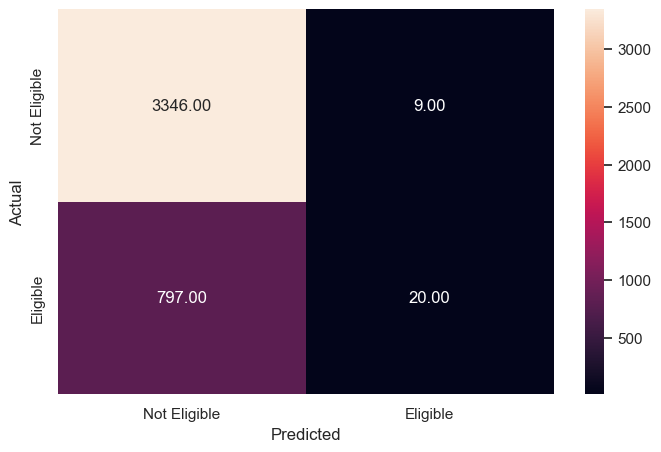

In [77]:
# Adjust the threshold to 0.35
custom_threshold = 0.35
y_pred_prob = lg.predict_proba(X_train)[:, 1]  # Predicted probabilities for the positive class

# Adjust predictions based on the custom threshold
y_pred_custom = (y_pred_prob >= custom_threshold).astype(int)

# Now y_pred_custom contains the binary predictions using the custom threshold of 0.35

#Predict for train set
y_pred_train_custom = lg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train_custom)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



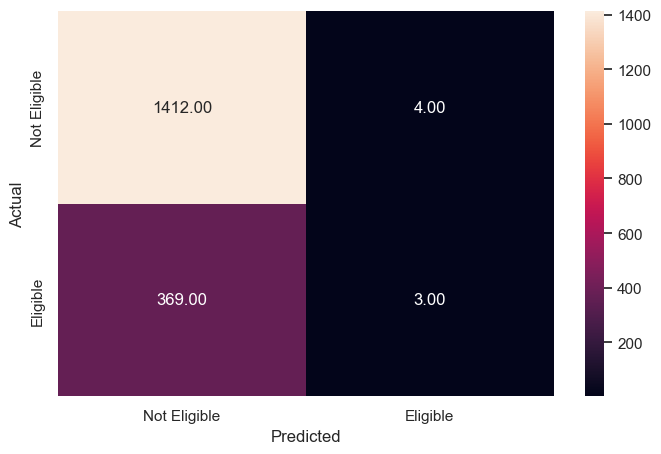

In [80]:
y_pred_prob = lg.predict_proba(X_train)[:, 1]  # Predicted probabilities for the positive class

# Adjust predictions based on the custom threshold
y_pred_custom = (y_pred_prob >= custom_threshold).astype(int)

# Now y_pred_custom contains the binary predictions using the custom threshold of 0.35

#Predict for train set
y_pred_test_custom = lg.predict(X_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test_custom)

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold? **optimal_threshold1 = .35 / y_pred_train = lg.predict_proba(x_train) / metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)**
 
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [81]:
#@title
# Add binary flags
# List of columns that has missing values in it

missing_col = [col for col in data.columns if data[col].isnull().any()]

for column in missing_col:
    add_binary_flag(data,column)
    

In [82]:
#@title
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [83]:
#@title
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = data.drop(['BAD'], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

y = data["BAD"]

#### Split the data

In [84]:
#@title
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [85]:
#@title
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

d_tree = DecisionTreeClassifier (class_weight = {0: 0.2, 1:0.8}, random_state=1)

In [86]:
#@title
#fitting Decision tree model

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



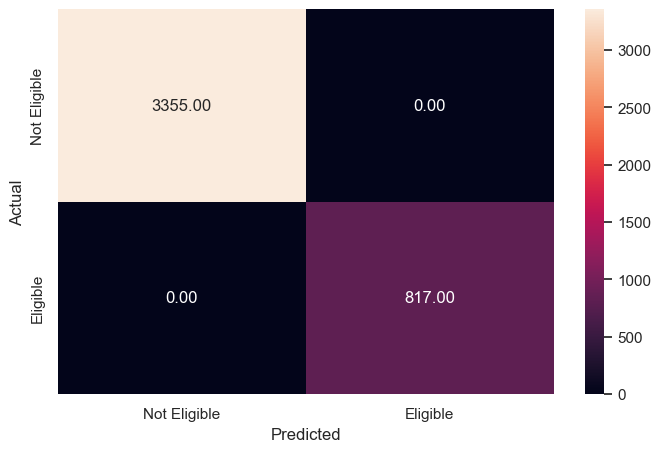

In [87]:
#@title
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1416
           1       0.68      0.56      0.62       372

    accuracy                           0.85      1788
   macro avg       0.79      0.75      0.76      1788
weighted avg       0.85      0.85      0.85      1788



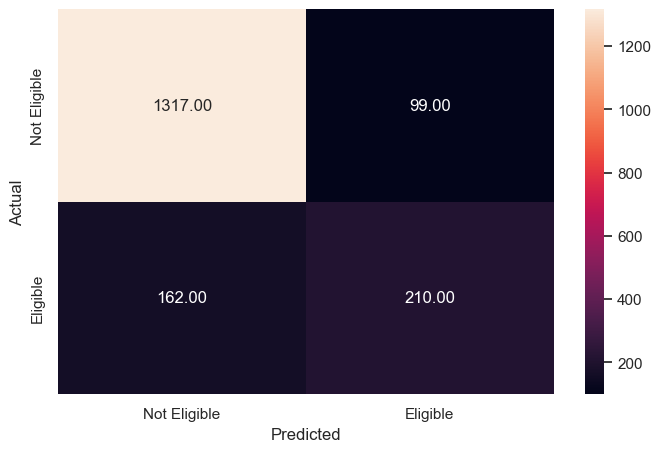

In [88]:
#@title
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Insights**
- The Decision tree is giving a **100% score for all metrics on the training dataset.** This is an indicator that the model is overfitting.
- The accuracy on the test dataset is 0.85 which is a good indicator that the model is not overfitting. 
- The `precision` and the `recall` are 0.68 and 0.56 respectivelly. These numbers can be improved.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [89]:
#@title
# Choose the type of classifier.
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label = 1)


# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_



# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=4,
                       min_samples_leaf=5, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3355
           1       0.65      0.76      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.88      4172



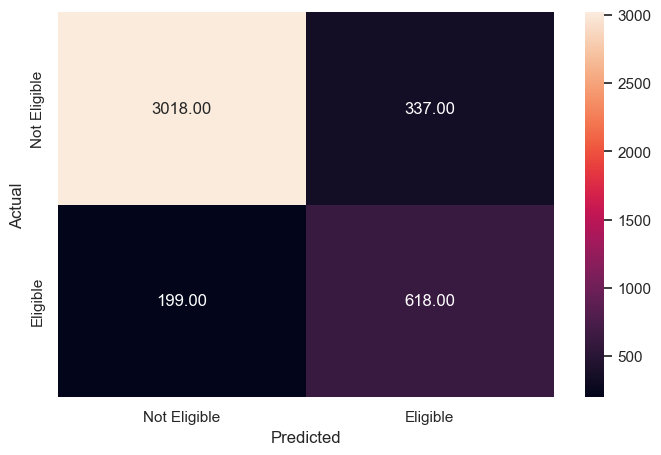

In [90]:
#@title
# Checking performance on the training data based on the tuned model

y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.66      0.73      0.69       372

    accuracy                           0.87      1788
   macro avg       0.80      0.82      0.80      1788
weighted avg       0.87      0.87      0.87      1788



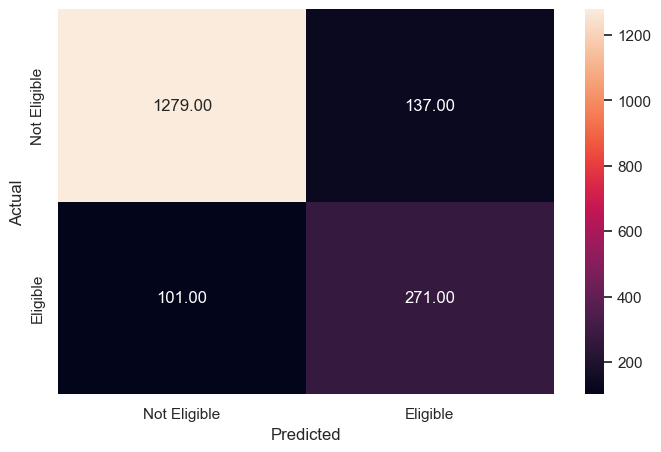

In [91]:
#@title
# Checking performance on the testing data based on the tuned model

y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)


**Insights**

* The accuracy on both train datase and test dataset has been slightly improved. That means the model is not overfitting.
* The tuned model shows better results regarding `recall`. However `precision` has been slightly decreased.

#### Plotting the Decision Tree

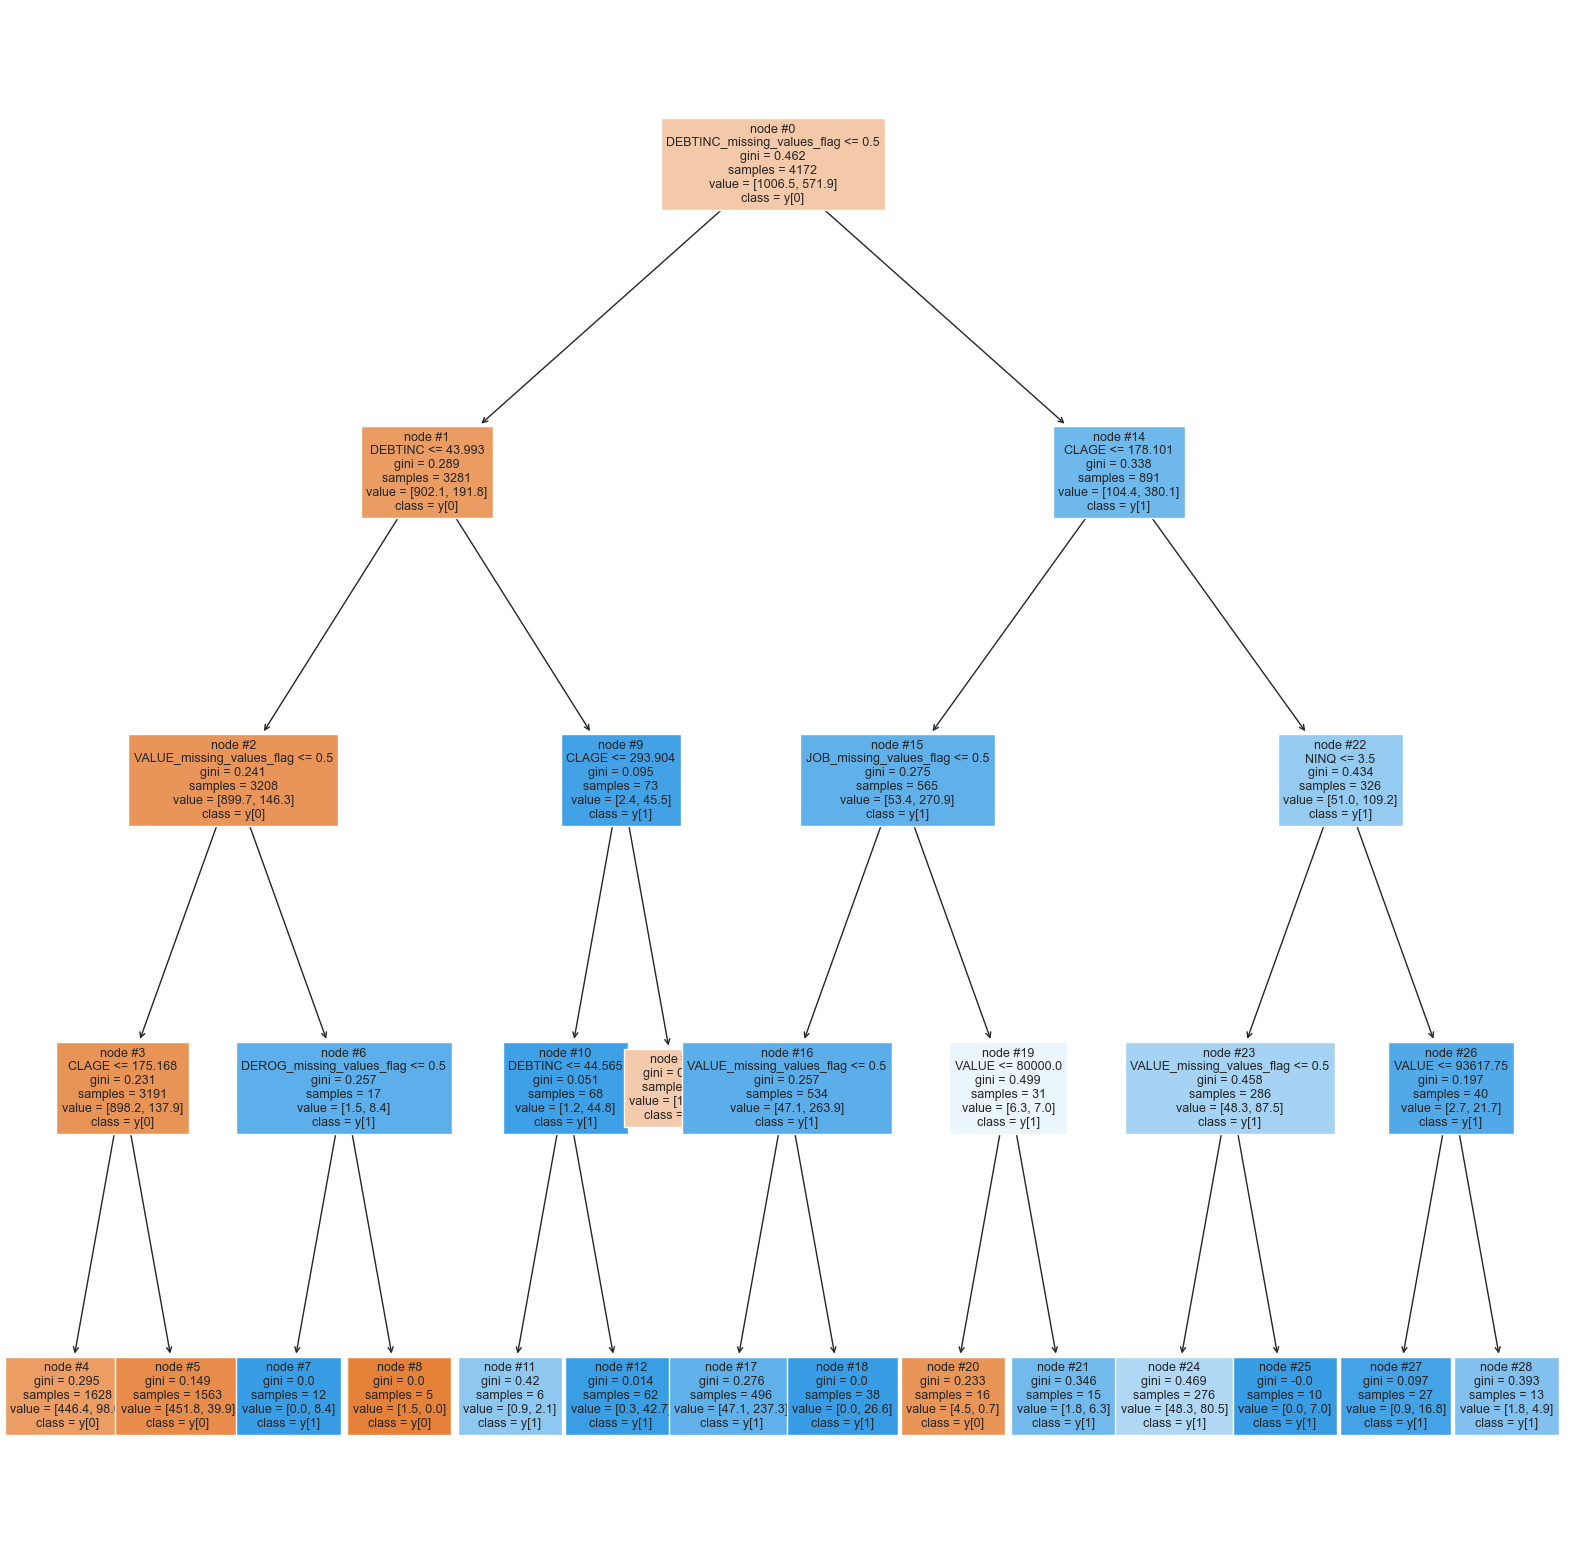

In [92]:
#@title
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [122]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.721832
DEBTINC                      0.175486
VALUE_missing_values_flag    0.038345
CLAGE                        0.033176
VALUE                        0.008924
JOB_missing_values_flag      0.007672
NINQ_missing_values_flag     0.007373
NINQ                         0.007193
DELINQ_missing_values_flag   0.000000
JOB_Sales                    0.000000
JOB_ProfExe                  0.000000
JOB_Other                    0.000000
JOB_Office                   0.000000
REASON_HomeImp               0.000000
CLNO_missing_values_flag     0.000000
CLAGE_missing_values_flag    0.000000
LOAN                         0.000000
DEROG_missing_values_flag    0.000000
YOJ_missing_values_flag      0.000000
MORTDUE                      0.000000
REASON_missing_values_flag   0.000000
MORTDUE_missing_values_flag  0.000000
CLNO                         0.000000
DELINQ                       0.000000
DEROG                        0.000000
YOJ         

#### Deduce the business rules apparent from the Decision Tree and write them down:

* From the features of the Decision Tree we have noticed that the most important features by order are; **DEBTINC_missing_values_flag**, **DEBTINC**. Missing values from the DEBTINC variable seems to be play an important role and the bank should force filling these values for each applicant.
* The secondary variables which are vital  are **VALUE_missing_values_flag, CLAGE**. Similarly, the missing values from the **VALUE** variable are playing an important role to our model. 
* The least important variables are **VALUES, JOB_missing_values_flag, NINQ_missing_values_flag and NINQ**.
* The rest of the variables have no impact in this model.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [94]:
#@title
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



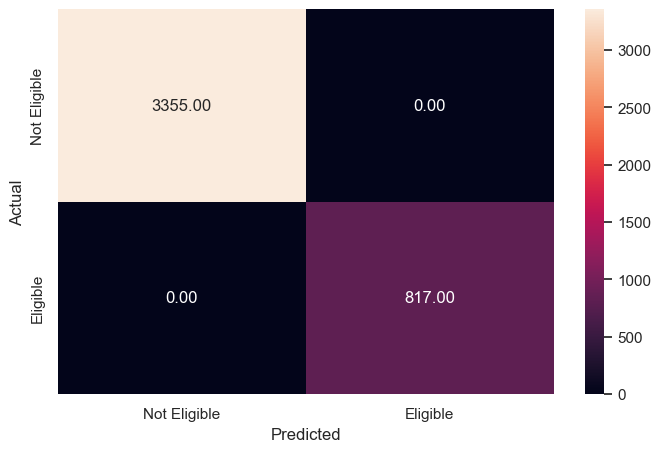

In [95]:
#@title
#Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

- The Decision tree is giving a **100% score for all metrics on the training dataset.** This is an indicator that the model is overfitting.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1416
           1       0.83      0.62      0.71       372

    accuracy                           0.89      1788
   macro avg       0.87      0.79      0.82      1788
weighted avg       0.89      0.89      0.89      1788



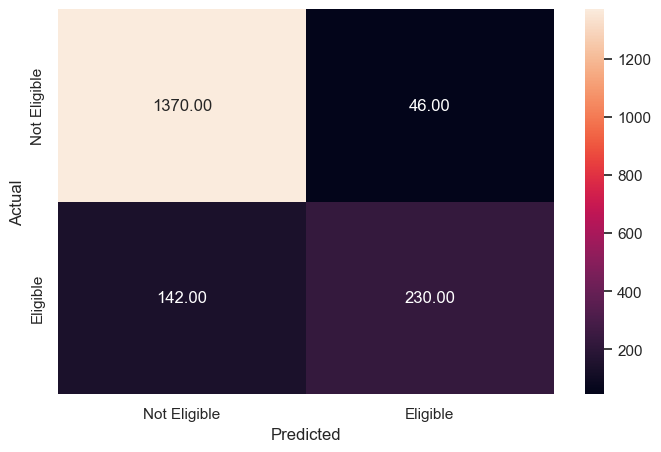

In [167]:
#@title
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

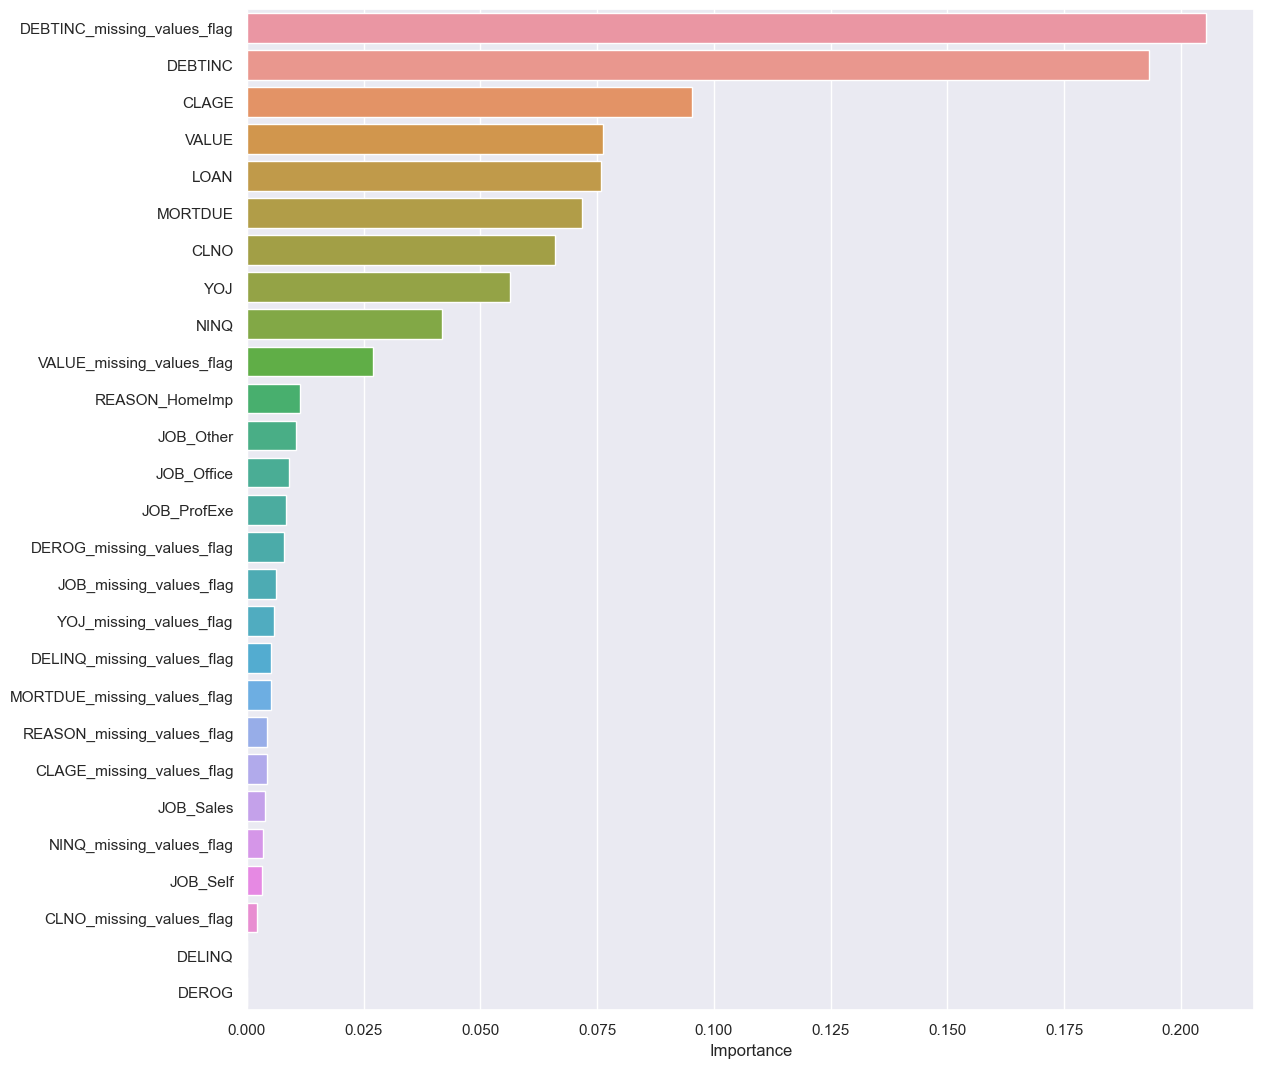

In [96]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

**Observations:**

* The **Random Forest** model is overfitting to the trainig data. The testing data have **accuracy of 0.89** which is a very good indicator that the data work very well.
* The `recall` on the training data is 1 while the recall on the test data is **0.62** 
* `Precision` on the training data is 1 and on the test data is **0.83**
* Same as Decision Tree, the Random Forest shows us that the most important feature is the **DEBTINC_missing_values_flag** and **DEBTINC** variables. 
* The second most important variables are **CLAGE, VALUE, LOAN, MORTDUE, CLNO, YOJ,NINQ**. In addition to that variables the missing values of **VALUE** must be filled.

### **Build a Random Forest model with Class Weights**

In [99]:
#@title
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)
parameters = {
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
}
# Fitting Random Forest model
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



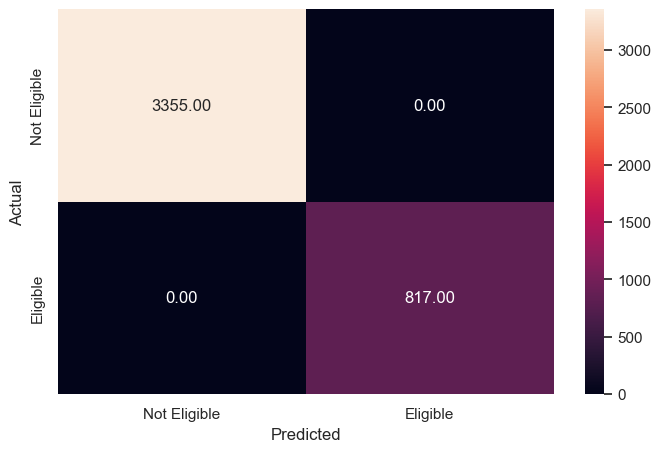

In [100]:
#@title
# Checking performance on the train data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.81      0.63      0.71       372

    accuracy                           0.89      1788
   macro avg       0.86      0.79      0.82      1788
weighted avg       0.89      0.89      0.89      1788



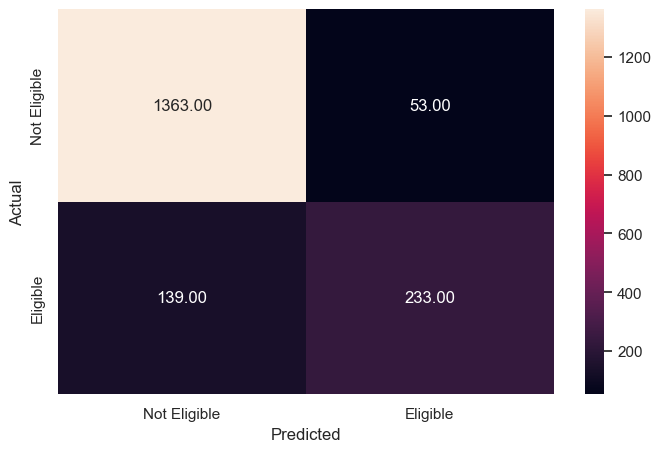

In [175]:
#@title
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [113]:
#@title
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250],
    "max_depth": [8, 9],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.7, 0.9, 'auto'],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label = 1)
scorer = make_scorer(precision_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=25, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3355
           1       0.63      0.78      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.84      0.81      4172
weighted avg       0.88      0.87      0.87      4172



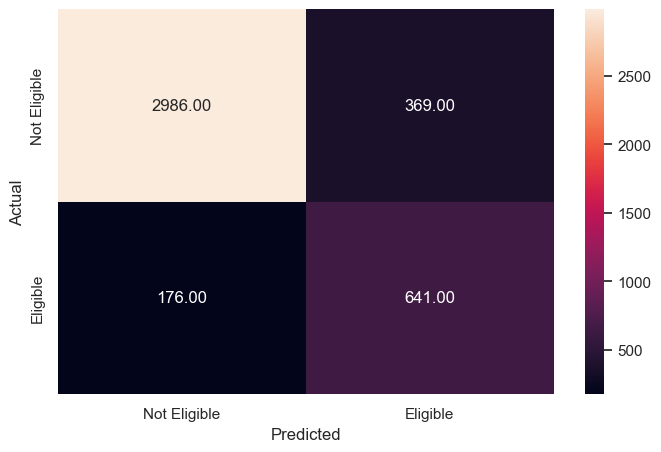

In [115]:
#@title
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.65      0.73      0.69       372

    accuracy                           0.86      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.86      0.86      1788



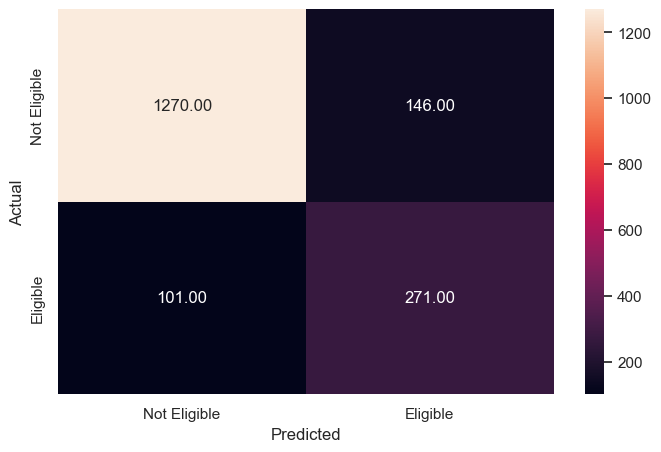

In [116]:
#@title
# Checking performace on test dataset
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Insights:**

* The train and the test dataset are working well with this model and they are not overfitting.
* Recall on the train dataset has better results (0.78) than the test dataset which is (0.73)
* Precision seems to have the same results on both train dataset and test data with 0.63 and 0.65 respectivelly.

#### Plot the Feature importance of the tuned Random Forest

<Axes: xlabel='Importance'>

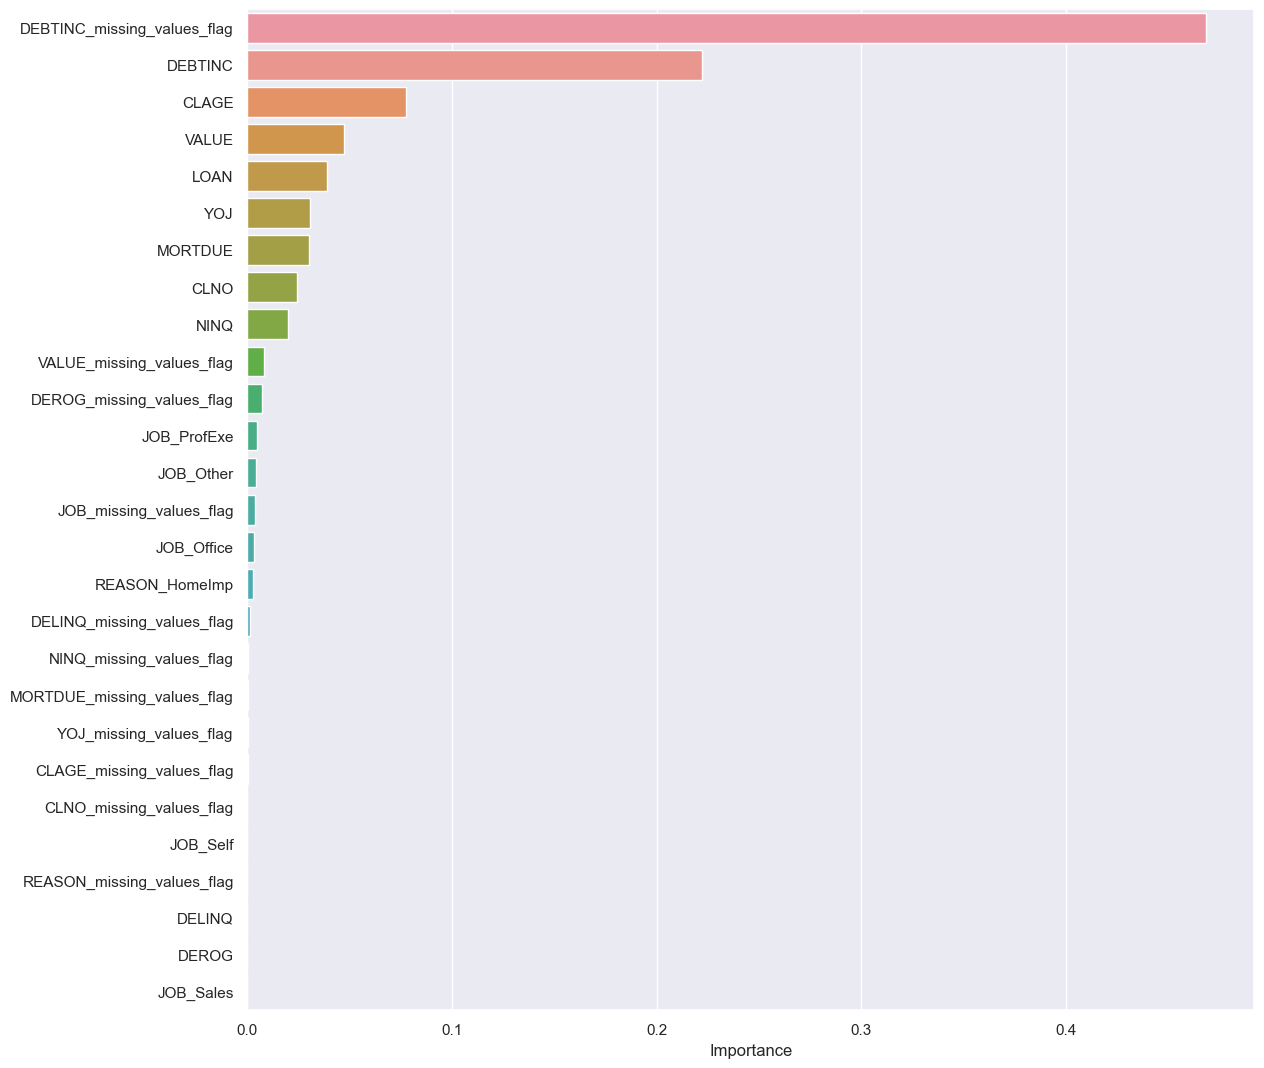

In [118]:
#@title
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [142]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [143]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [144]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [155]:
#@title
# Make the list of all the model names 

models = [lg, d_tree, d_tree_tuned, rf_estimator, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [170]:
#@title
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Logistic Regression        0.806807       0.791387      0.024480   
1        Decision Tree        1.000000       0.854027      1.000000   
2  Decision Tree Tuned        0.871524       0.866890      0.756426   
3        Random Forest        1.000000       0.897092      1.000000   
4  Random Forest Tuned        0.869367       0.861857      0.784578   

   Test_Recall  Train_Precision  Test_Precision  
0     0.008065         0.689655        0.428571  
1     0.564516         1.000000        0.679612  
2     0.728495         0.647120        0.664216  
3     0.634409         1.000000        0.830986  
4     0.728495         0.634653        0.649880

**Insights:**

As it seems by the results above we can make the following conclusions:
- **Logistic Regression** model is working on both train and test data, without overfitting. However we have very poor results regarding Recall. In addition `Precision` has not very good results. We can't but to reject this model.
- **Decision Tree** is working well on test dataset but not so good on the train dataset as it is overfitted. The results for Recall and Precision are not so encouraging. For Recall on the test data we have 0.56 and for Precision 0.67. These numbers will not help us to deploy the model.
- **Decision Tree Tuned** has a balanced results for train and test dataset `Accurace`,`Recall` and `Precision`. However the numbers for **Train Precision** and **Test Precision** which are **0.64** - **0.66** respectivelly are not very promising.
- **Random Forest** works very well on the test dataset. On the other hand, the train data are overfitting the model. We notice good results on **Test_Precision**. However the result on the **Test_Recall** is around 0.63 which is not so encouraging; 
- **Random Forest Tuned** works well on both train and test dataset. It is observed that **Test_Recall** has better results than those of Random Forest. On the other hand **Test_Precision** has been dropped significanlty than those of Random Forest.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- As has been observed above, **Logistic Regression** is giving us very poor results on **Test_Recall** and should be not taken into consideration any more. From the coefficients we can only assume that only one variable **DEBTINC** is important due to the larger number from the rest of the variables. The rest positive variables have very similar results hence we cannot understand the weight and role of each one. In addition it more clear which are the most important features further in the project.
- **Decision Tree** is overfitting the train data. Works well on the test data but we have received poor results for **Test_Recall** & **Test_Precision**. From the coefficients it is more clear which are the most important features (*have been mentioned above*). 
- **Decision Tree Tuned** seems to work well on train data and test data. **Test_Recall** gives us better number compared to Decision Tree. Similiraly, coefficients give us the same important features as before.
- **Random Forest** is overfitting on the train data but it works very well on the test data. In addition to that the results on **Test_Precision** are very good compared to the previous models of Decision Tree and Decision Tree Tuned. From this model we notice that the most important feature is **DEBTINC_missing_values_flag** and after that the **DEBTINC**. The more complicated the models are, the better the results of the coefficients.
- **Random Forest Tuned** has totally a better balance through all the metrics. The model works very well on the train and test dataset even though we have a significant difference of the **Test_Precision** between RFT and RF.

- In summary as **measure of success** it must be consider **Random Forest** which works very well on the test data with the highest accuracy through the rest of the modesls and with the highest value of **Test_Precision**. We must keep in mind that if we keep this model we will have a better prediction on identifying the applicants who are **Not Eligible** which means our client will lose a customer, but, on the other hand will not have a good `Recall` which means, lending money to a customer who will default the loan. In conclusion we are risking lending money to applicants who will possibly are not going to repay the loan.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

- We have a significant number of missing values for 11 variables with 1 of them reaching 20%. .
- The **REASON** of loan for most of the applicants is about **DebtCon**.
- We notice a significant difference in the average applicant’s years at a job with the maximum value.
- As studying the Bivariate Analysis between the **VALUE** and the **MORTDUE** variable we have observed a positive correlation which means there is a relationship among these two features. We can also notice that through the correlation matrix with an outcome of 0.88
- The most important feature is **DEBTINC_missing_values_flag** and **DEBTINC**. The fact that we are missing 20% of the data from the features is affecting our prediction models.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

- In matter of metrics, the **Random Forest** gives us very good results in `Precision` but we are missing the `Recall` which in fact will cost more money to the bank as they lend money to a customer who will default the loan.
- In matter of functionality the **Random Forest Tuned** is working better on train and test dataset with more balanced results on `Recall` and `Precision`. `Recall` in this case is slightly better than that of Random Forest and as a result, the bank will  not lend money to customers who will default the loan. 

- It is better to lose a potential customer who will repay the loan, than to lend money to customers who will are not going to repay the loan. Hence it is safer to adopt the **Random Forest Tuned**. 


- Unless we receive more data for the variable **DEBTINC** it would be suggested **NOT to deploy the model**. At the moment even though we are losing 20% of values of the most important variable in our models, it is still the most importatnt. Hence it would be wiser to gather the missing values of this variable and then proceed with reviewing the results of the models again.